In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 크롤링
import urllib
import requests
from urllib import request
from bs4 import BeautifulSoup

# 텍스트 분석
import json
import re
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
from functools import reduce

# 한글(for windows)
import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# '-' 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 표시 제한
#pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

#  차트 설정
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 2.0

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# 

# Ⅰ. 텍스트 분석 및 결과 시각화

## 1. 텍스트 분석 함수 생성

In [2]:
# Text cloud 함수 선언
def crawlingShowTextCloud(listValue:list, remove_list:list, count = 0):
    temp_list = [re.sub(r'[^\w]',' ',w) for w in listValue]
    temp = [i.split() for i in temp_list]
    temp = reduce(lambda x,y : x+y, temp)
    temp = [re.sub(r'[^\w]',' ',w) for w in temp]
    temp =[w for w in temp if len(w) > 1]
    temp = [w for w in temp if not np.any([w[-4:] in remove_list, w[-1] in remove_list])]
    temp_count = Counter(temp)

    if count != 0:     
        temp_count = dict(temp_count.most_common(count)) # 상위 count개

    wc = WordCloud(font_loc ,background_color='white',width=800,height=600)
    cloud = wc.generate_from_frequencies(temp_count)

    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

## 2. 크롤링

### - 2022년 8월 한달간 기사 제목 수집

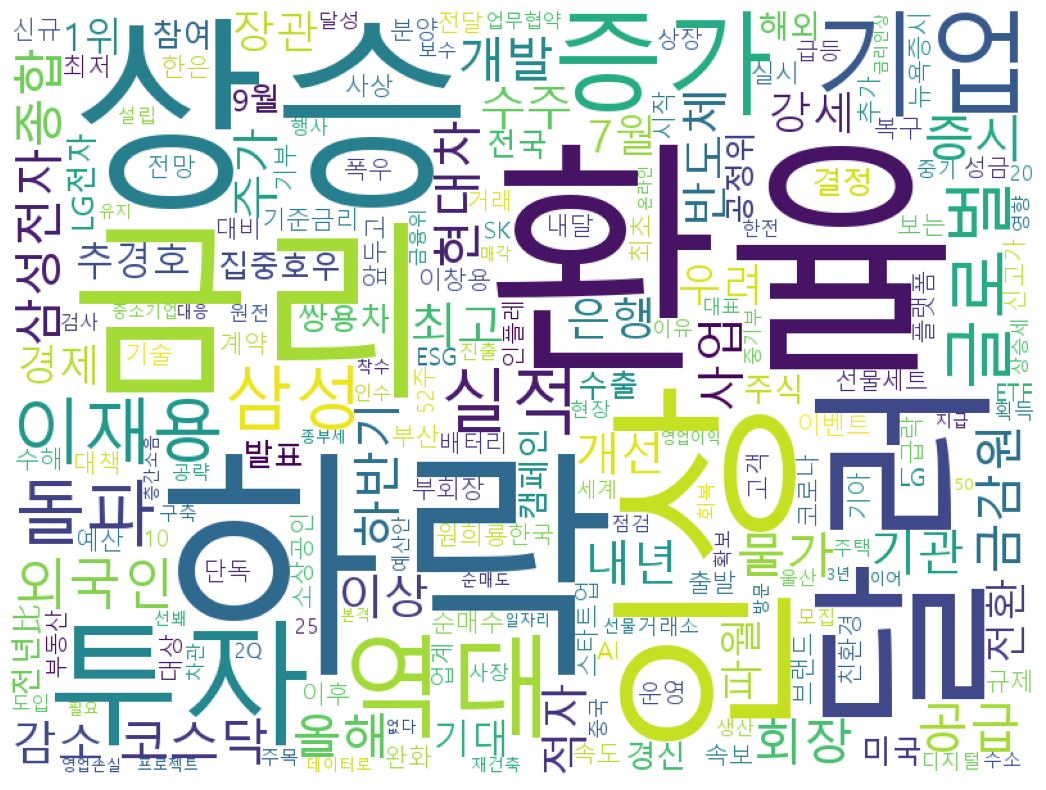

In [3]:
# 뉴스기사 제목 크롤링
# 2022년 8월 한달간 경제 관련 기사의 제목 텍스트 분석
title_list = []
for i in range(1, 301, 10):
    for j in range(1, 32):
        url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202208{j}'
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')

        news_data = soup.select('div > ul > li > div > strong > a')
        title_list += [news.text.strip() for news in news_data]

title = set(title_list) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
title = list(title) # 다시 리스트 형태로 변환

# 단어 추출 및 카운트
temp = [i.split() for i in title]
temp = reduce(lambda x, y : x+y, temp)
temp = [re.sub(r'[^\w]',' ',w) for w in temp]
temp = [w for w in temp if len(w) > 1]
temp_count = Counter(temp)
temp_count = dict(temp_count.most_common(100))

# 제거 단어 선정
remove_list = ['2022', '8월', '특징주', '정부', '코스피', '최대', '상반기', '출시', '추석', '지원', '2분기', '만에', '규모', '개최', '국내', '가격', '진행', '피해', '연속', '서비스', '아파트', '서울', '영업익', '매출', '시장', '판매', '확대', '체결', '할인', '마감', '선정', '전기차', '위한', '것', '강화', '포토', '추진', '오픈', '공개', '위해', '다시', '협력']

# Text Cloud 출력
crawlingShowTextCloud(title, remove_list)

### - 2021년 8월 한달간 기사 제목 수집

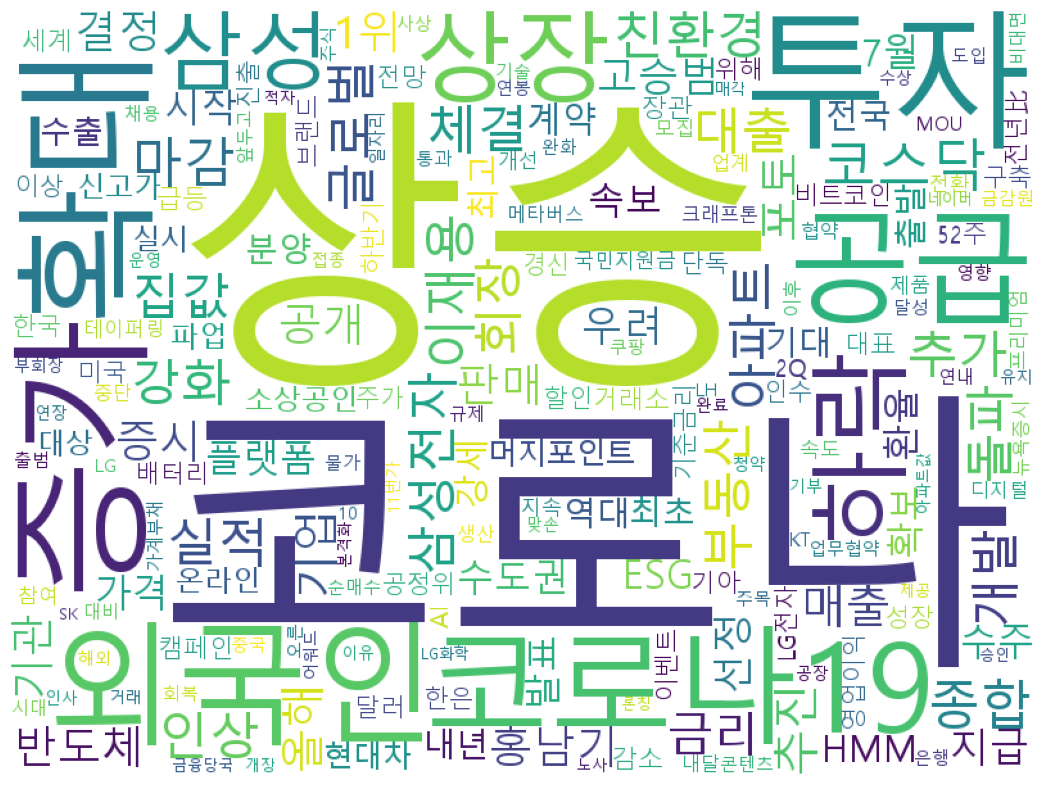

In [4]:
# 뉴스기사 제목 크롤링
# 2021년 8월 한달간 경제 관련 기사의 제목 텍스트 분석
title_list_2 = []
for i in range(1, 301, 10):
    for j in range(1, 32):
        url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202108{j}'
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        
        news_data = soup.select('div > ul > li > div > strong > a')
        title_list_2 += [news.text.strip() for news in news_data]

title_2 = set(title_list_2) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
title_2 = list(title_2) # 다시 리스트 형태로 변환

# 단어 추출 및 카운트
temp = [i.split() for i in title_2]
temp = reduce(lambda x,y : x+y, temp)
temp = [re.sub(r'[^\w]',' ',w) for w in temp]
temp =[w for w in temp if len(w) > 1]
temp_count = Counter(temp)
temp_count = dict(temp_count.most_common(100))

# 제거 단어 선정
remove_list = ['백신', '2021', '8월', '특징주', '정부','코스피', '출시', '규모', '최대', '2분기', '상반기', '서비스', '지원', '만에', '개최', '국내', '시장', '코로나19', '것', '추석', '체력', '진행', '오픈', '서울', '신규', '연속', '영업익', '사업', '위한', '9월', '전기차']

# Text Cloud 출력
crawlingShowTextCloud(title_2, remove_list)


# 

# Ⅱ. 데이터 수집 및 전처리

#### - 데이터 수집
한국은행 경제통계시스템

국가통계포털

e-나라지표

통계청

Wall Street Journal

Investing.com

## 1. 금리 데이터


In [8]:
# 데이터 불러오기
df_interest = pd.read_excel('interest rate.xlsx')

# 불필요 칼럼 제거
df_interest = df_interest.drop(columns = 'Unnamed: 0')
df_interest.head()

,연월,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%)
0,1995/01,5.5,1.75,12.06,14.01
1,1995/02,6.0,NaN,NaN,NaN
2,1995/03,NaN,NaN,NaN,NaN
3,1995/04,NaN,1.00,NaN,NaN
4,1995/05,NaN,NaN,NaN,13.51


In [9]:
# 데이터 확인
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연월        332 non-null    object 
 1   미국_금리(%)  102 non-null    float64
 2   일본_금리(%)  17 non-null     float64
 3   중국_금리(%)  82 non-null     float64
 4   한국_금리(%)  119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [10]:
# 결측데이터 확인
df_interest.isna().sum()

# 결측데이터를 앞의 데이터로 채우기 → 금리를 새로 공시하기 전까지는 이전에 공시한 금리를 유지하기 때문
df_interest.fillna(method = 'ffill', inplace=True)

# 결측데이터 확인
df_interest.isna().sum()

연월          0
미국_금리(%)    0
일본_금리(%)    0
중국_금리(%)    0
한국_금리(%)    0
dtype: int64

In [12]:
# 인덱스 리셋
df_interest.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_interest.to_excel('금리.xlsx')

## 2. 무역수지/외채 관련 데이터

In [13]:
# 데이터 불러오기
df_debt = pd.read_excel('other_data.xlsx')

# 불필요 칼럼 제거
df_debt = df_debt.drop(['Unnamed: 0','연월'], axis=1)
df_debt.head()

,무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,-1201000000,80800000000,36200000000,1.790688,0.448020
1,-1462000000,80800000000,36200000000,1.782530,0.448020
2,-1668000000,80800000000,36200000000,1.771330,0.448020
3,-934000000,89200000000,41900000000,1.995662,0.469731
4,-1171000000,89200000000,41900000000,1.958120,0.469731


In [14]:
# 데이터 확인
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   무역수지(달러)    332 non-null    int64  
 1   총외채(달러)     332 non-null    int64  
 2   단기외채(달러)    332 non-null    int64  
 3   단기외채/외환보유액  332 non-null    float64
 4   단기외채/총외채    332 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.1 KB


In [16]:
# 인덱스 리셋
df_debt.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_debt.to_excel('무역수지_외채.xlsx')

## 3. 기타 경제 지표 데이터


In [18]:
# 데이터 불러오기
df_rest = pd.read_excel('change.xlsx')

# 불필요 칼럼 제거
df_rest = df_rest.drop(columns = 'Unnamed: 0')
df_rest.head()

,연월,원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,Brent(U$/bbl),금($/OZ),미국(NASDAQ)1980.1.4=100,일본(NIKKEI)1980.1.4=100,중국(SHCOMP)1980.1.4=100,한국(KOSPI)(1980.1.4=100),가상화폐(달러),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외화보유액(백만달러),중국_외화보유액(백만달러),한국_외화보유액(백만달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러)
0,1995/01,786.7,93.548540,791.65,88.03,17.05,375.1,755.20,18649.82,562.59,925.56,NaN,68.93,101.33,71.41,58.87,183250,75377,25634400,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820
1,1995/02,786.0,93.659190,809.47,85.92,17.22,377.1,793.74,17053.43,549.26,885.69,NaN,69.20,101.02,72.06,59.11,183250,75377,25752333,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820
2,1995/03,771.5,91.628691,862.25,82.08,18.00,391.4,817.21,16139.95,646.92,931.78,NaN,69.43,100.91,72.26,59.71,183250,75377,25878700,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820
3,1995/04,761.8,90.676071,904.21,81.92,19.31,387.1,843.98,16806.75,579.93,897.00,NaN,69.66,101.23,73.56,60.07,183250,75377,26551800,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820
4,1995/05,760.1,91.246764,913.58,82.67,17.67,384.3,864.58,15436.79,700.51,882.50,NaN,69.80,101.43,74.17,60.19,183250,75377,27068000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820


In [19]:
# 단위 맞추기(백만달러 → 달러) → 외환보유액 이외의 지표들은 단위가 '달러'이기 때문에 지표 조정
df_rest['일본_외화보유액(백만달러)'] = df_rest['일본_외화보유액(백만달러)'].apply(lambda x : x*1000)
df_rest['중국_외화보유액(백만달러)'] = df_rest['중국_외화보유액(백만달러)'].apply(lambda x : x*1000)
df_rest['한국_외화보유액(백만달러)'] = df_rest['한국_외화보유액(백만달러)'].apply(lambda x : x*1000)

# column명 변경
df_rest.rename(columns = {'일본_외화보유액(백만달러)' : '일본_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'중국_외화보유액(백만달러)' : '중국_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'한국_외화보유액(백만달러)' : '한국_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'미국(NASDAQ)1980.1.4=100' : '미국(NASDAQ)(1980.1.4=100)'}, inplace=True)
df_rest.rename(columns = {'일본(NIKKEI)1980.1.4=100' : '일본(NIKKEI)(1980.1.4=100)'}, inplace=True)
df_rest.rename(columns = {'중국(SHCOMP)1980.1.4=100' : '중국(SHCOMP)(1980.1.4=100)'}, inplace=True)

# 불필요한 column 삭제
df_rest = df_rest.drop(['연월','Brent(U$/bbl)', '금($/OZ)', '가상화폐(달러)'], axis=1)

# 데이터 확인
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   원/미국달러(매매기준율)             332 non-null    float64
 1   원/위안(매매기준율)               332 non-null    float64
 2   원/일본엔(100엔)               332 non-null    float64
 3   달러_인덱스                    332 non-null    float64
 4   미국(NASDAQ)(1980.1.4=100)  332 non-null    float64
 5   일본(NIKKEI)(1980.1.4=100)  332 non-null    float64
 6   중국(SHCOMP)(1980.1.4=100)  332 non-null    float64
 7   한국(KOSPI)(1980.1.4=100)   332 non-null    float64
 8   미국_소비자물가지수(2010=100)      332 non-null    float64
 9   일본_소비자물가지수(2010=100)      332 non-null    float64
 10  중국_소비자물가지수(2010=100)      332 non-null    float64
 11  한국_소비자물가지수(2010=100)      332 non-null    float64
 12  일본_외환보유액(달러)              332 non-null    int64  
 13  중국_외환보유액(달러)              332 non-null    int64  
 14  한국_외환보유액(달

In [21]:
# 인덱스 리셋
df_rest.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_rest.to_excel('기타_경제지표.xlsx')

## 4. 데이터 병합

In [23]:
df = pd.concat([df_interest, df_rest, df_debt], axis=1)
df.reset_index(drop = True)

# 최종 파일 excel로 변환
df.to_excel('korea_economy.xlsx')

## 5. 아직 발표하지 않은 8월 경상수지 데이터 유추하기

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score 

# 경상수지를 예측하기 위해서 경상수지와 연관된 것으로 예상하는 컬럼 추출
dfq = df[['연월', '원/미국달러(매매기준율)', '달러_인덱스', '한국(KOSPI)(1980.1.4=100)', '한국_경제성장률(%)', '무역수지(달러)', '한국_1인당_국민소득(달러)', '경상수지(달러)']]
dfq

,연월,원/미국달러(매매기준율),달러_인덱스,한국(KOSPI)(1980.1.4=100),한국_경제성장률(%),무역수지(달러),한국_1인당_국민소득(달러),경상수지(달러)
0,1995/01,786.7,88.030,925.56,9.6,-1201000000,11820,-1209000000
1,1995/02,786.0,85.920,885.69,9.6,-1462000000,11820,-1522000000
2,1995/03,771.5,82.080,931.78,9.6,-1668000000,11820,-1562000000
3,1995/04,761.8,81.920,897.00,9.6,-934000000,11820,-748000000
4,1995/05,760.1,82.670,882.50,9.6,-1171000000,11820,-959000000
...,...,...,...,...,...,...,...,...
327,2022/04,1269.4,102.963,2695.05,0.7,-2508000000,34994,-79000000
328,2022/05,1245.8,101.766,2685.90,0.7,-1614000000,34994,3860000000
329,2022/06,1292.9,104.464,2332.64,0.7,-2487000000,34994,5610000000
330,2022/07,1304.0,105.779,2451.50,0.7,-4805000000,34994,1089000000


In [25]:
# 75% : 25% 로 나누기
dft = dfq.iloc[:251]
dfp = dfq.iloc[251:]

# 훈련데이터와 테스트데이터 분류 및 컬럼 선정
xt = dft[['한국_경제성장률(%)', '달러_인덱스', '무역수지(달러)', '한국(KOSPI)(1980.1.4=100)', '원/미국달러(매매기준율)']]
yt = pd.DataFrame(dft['경상수지(달러)'])
xp = dfp[['한국_경제성장률(%)', '달러_인덱스', '무역수지(달러)', '한국(KOSPI)(1980.1.4=100)', '원/미국달러(매매기준율)']]
yp = pd.DataFrame(dfp['경상수지(달러)'])

# 회귀분석
lr = LinearRegression()
lr.fit(xt, yt)

# 예측값 저장
predict = lr.predict(xp)
print(f'2022년 08월 경상수지 예측값 : {predict[-1][0]}')
print(f'결정계수 : {lr.score(xp, yp)}')
print(f'조정된 결정계수 : {r2_score(lr.predict(xp), yp)}')

2022년 08월 경상수지 예측값 : -5614968279.120727
결정계수 : 0.34472756943491834
조정된 결정계수 : 0.30462936341776203


In [28]:
# 예측한 2022년 8월 경상수치 데이터 추가
df['경상수지(달러)'][331] = -5614968249

# 최종 파일 excel로 변환
df.to_excel('korea_economy.xlsx')

In [30]:
data = pd.read_excel('korea_economy.xlsx')

result = []
for i in data['연월']:
    result.append(i.split('/')[0])

data.insert(2, '년도', result)                
del data['Unnamed: 0']
data['년도'] = data['년도'].astype(int)

## 6. '리스크 분류' 컬럼 추가

In [31]:
# '리스크 분류' 컬럼 추가
# 평시
data['리스크_분류'] = 0

# 1997년 외환위기(1997년 12월 ~ 2001년 8월)
data['리스크_분류'][35:80] = 1

# 2008년 금융위기(2007년 4월 ~ 2009년 4월)
data['리스크_분류'][147:172] = 2

# data 확인
data

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000,75377000,25634400000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000,75377000,25752333000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000,75377000,25878700000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000,75377000,26551800000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000,75377000,27068000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000,3119720000,425076761000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000,3127780000,423355152000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000,3071272000,414491928000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000,3104071000,415046922000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644,0


# 

# Ⅲ. 데이터 분석 및 시각화

## 1. 주요 지표들 간의 상관관계

### ① 상관계수

In [32]:
# 금리
df_rel = data.iloc[:, [2, 5, 6, 20, 25, 37]]
df_rel.corr()

,미국_금리(%),한국_금리(%),원/미국달러(매매기준율),한국_외환보유액(달러),경상수지(달러),단기외채(달러)
미국_금리(%),1.000000,0.706181,-0.369240,-0.744106,-0.539321,-0.623554
한국_금리(%),0.706181,1.000000,-0.256090,-0.769358,-0.448623,-0.521725
원/미국달러(매매기준율),-0.369240,-0.256090,1.000000,0.155932,0.283542,0.084313
한국_외환보유액(달러),-0.744106,-0.769358,0.155932,1.000000,0.640513,0.806497
경상수지(달러),-0.539321,-0.448623,0.283542,0.640513,1.000000,0.393807
단기외채(달러),-0.623554,-0.521725,0.084313,0.806497,0.393807,1.000000


### ② 상관계수 heatmap 시각화

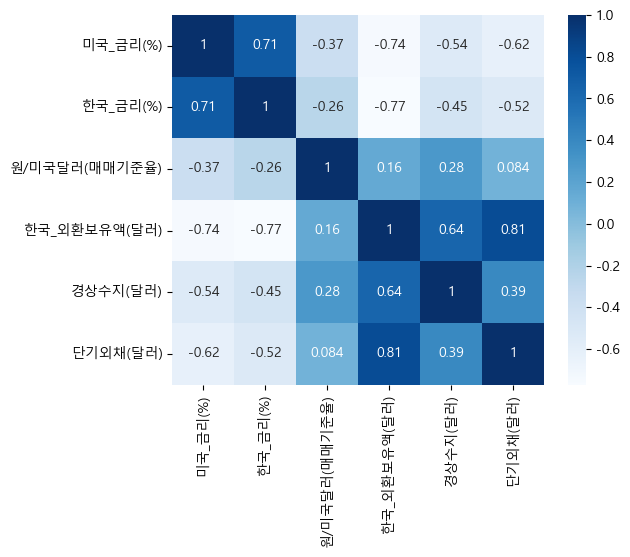

In [33]:
# 금리
plt.figure(figsize=(6,4.8))
sns.heatmap(df_rel.corr(), annot = True, cmap='Blues')
plt.show()

## 2. 데이터 분석 시작

### - 분석의 편의를 위해 국가별 df 생성

In [34]:
# 국가별 df
df_usa = data.iloc[:, [0, 1, 2, 6, 9, 10, 14, 21, 26, 29, 31]]
df_japan = data.iloc[:, [0, 1, 3, 8, 11, 15, 18, 22, 27, 32]]
df_china = data.iloc[:, [0, 1, 4, 7, 12, 16, 19, 23, 33]]
df_korea = data.iloc[:, [0, 1, 5, 6, 7, 8, 13, 17, 20, 24, 25, 28, 29, 30, 34, 35, 36, 37, 38, 39]]

df_korea

,연월,년도,한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_소비자물가지수(2010=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,1995,14.01,786.7,93.548540,791.65,925.56,58.87,25634400000,9.6,-1209000000,2.1,0.34,0.470935,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,1995,14.01,786.0,93.659190,809.47,885.69,59.11,25752333000,9.6,-1522000000,2.2,0.43,0.470935,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,1995,14.01,771.5,91.628691,862.25,931.78,59.71,25878700000,9.6,-1562000000,2.1,0.40,0.470935,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,1995,14.01,761.8,90.676071,904.21,897.00,60.07,26551800000,9.6,-748000000,2.0,0.47,0.470935,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,1995,13.51,760.1,91.246764,913.58,882.50,60.19,27068000000,9.6,-959000000,2.1,0.41,0.470935,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,1.50,1269.4,192.030000,970.16,2695.05,123.71,425076761000,0.7,-79000000,2.7,0.19,0.419000,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,2022,1.75,1245.8,186.400000,975.61,2685.90,124.53,423355152000,0.7,3860000000,2.8,0.32,0.419000,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,2022,1.75,1292.9,192.750000,946.45,2332.64,125.29,414491928000,0.7,5610000000,2.9,0.06,0.419000,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2022,2.25,1304.0,193.350000,970.53,2451.50,125.90,415046922000,0.7,1089000000,2.9,-0.22,0.419000,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


### - 지표 비교를 위한 기간별 df 생성

In [35]:
# <경제 위기>
# 1997년 외환위기
IMF_k = df_korea.iloc[10:36, :]
IMF_k.reset_index(drop=True, inplace=True)

# 2008년 금융위기
global_dep = df_korea.iloc[145:165, :]
global_dep.reset_index(drop=True, inplace=True)

# 2022년 현재
ty = df_korea.iloc[324:, :]
ty.reset_index(drop=True, inplace=True)


# <경제적 호황기>
# 나스닥, 코스피 최고점 기간(2021)
ly = df_korea.iloc[300:324, :]
ly.reset_index(drop=True, inplace=True)

## 1) 금리

### ① 1995 ~ 2022년 금리 변화

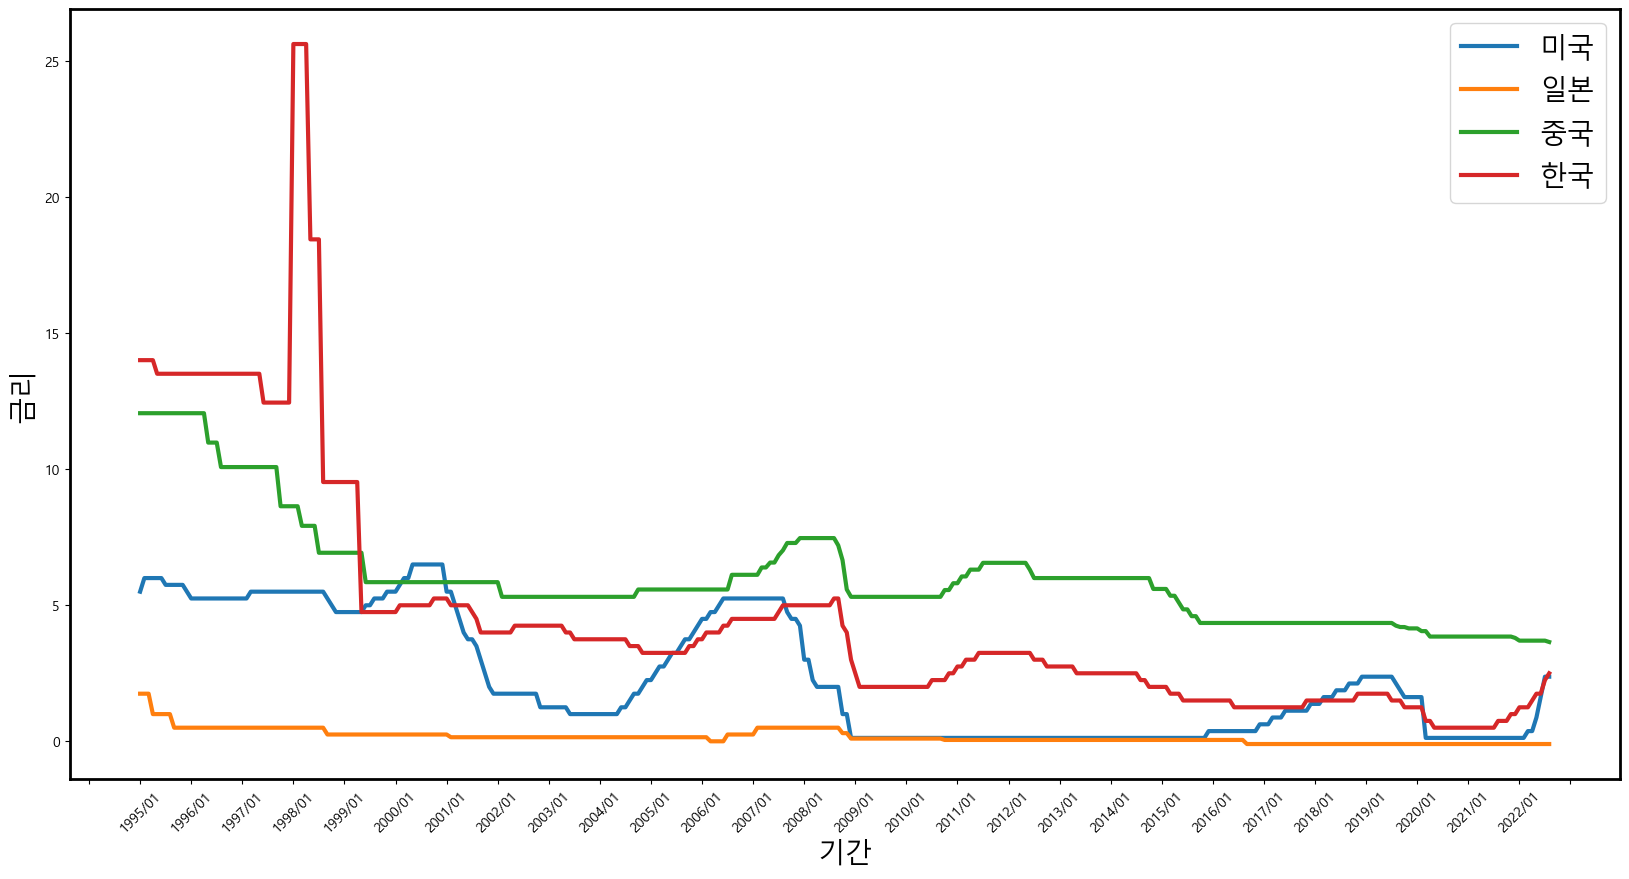

In [36]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
ax.set_ylabel(' ')

sns.lineplot(df_usa, x='연월', y='미국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_japan, x='연월', y='일본_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_china, x='연월', y='중국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_korea, x='연월', y='한국_금리(%)', errorbar=None, legend=True, ax=ax)

ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('기간', fontsize=20)
plt.ylabel('금리', fontsize=20)
plt.legend(['미국', '일본', '중국', '한국'], fontsize=20)
plt.rcParams["axes.grid"] = False
plt.show()

### ② 최근 소비자 물가 급상승

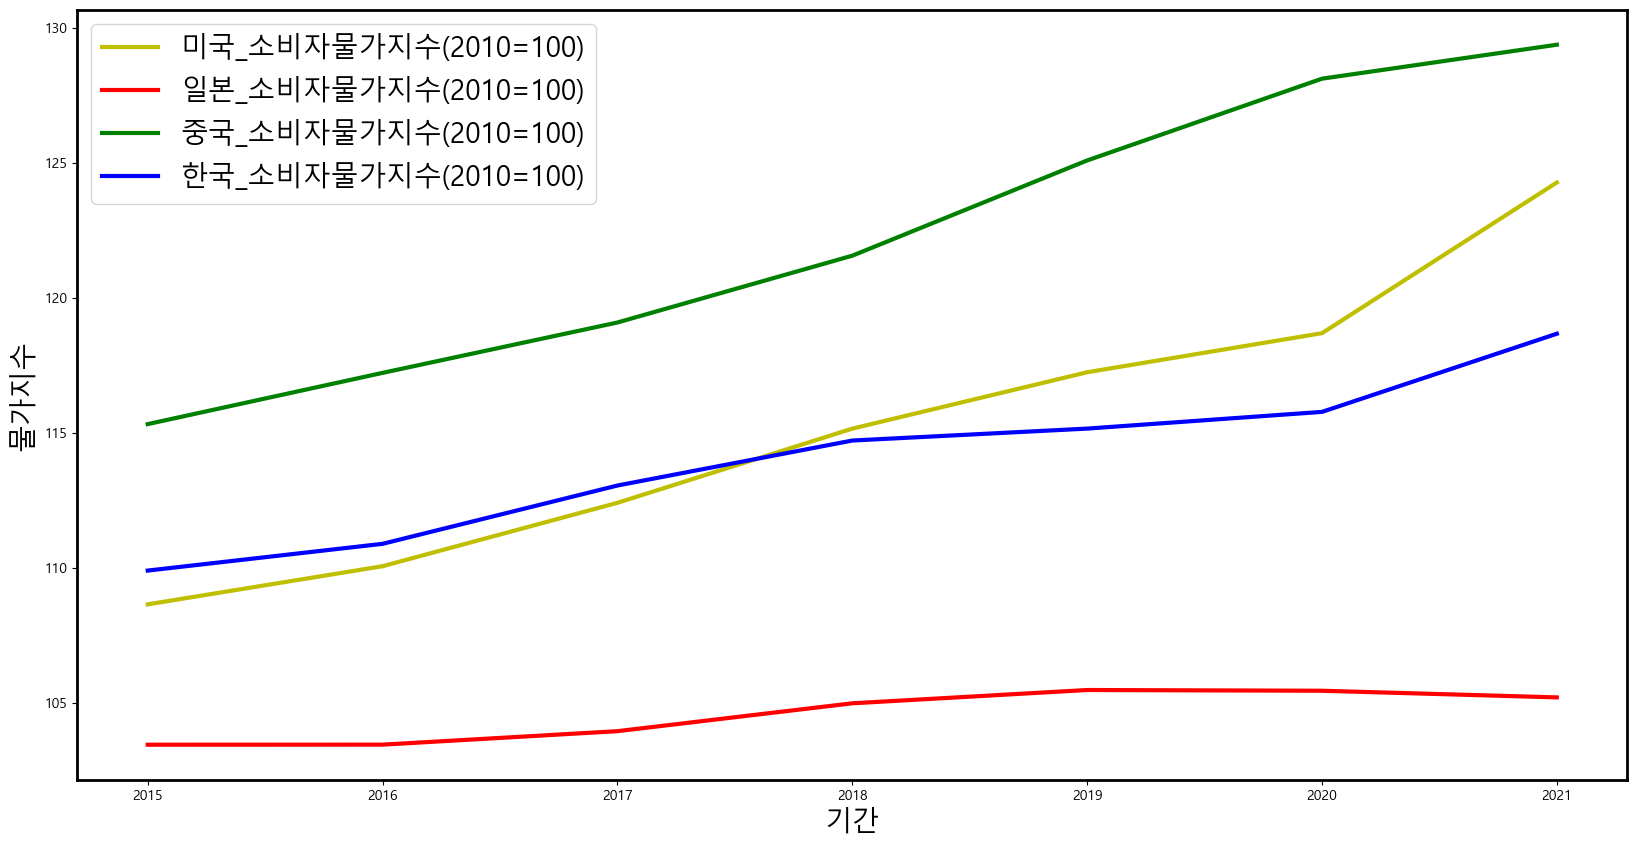

In [37]:
df_inf = data.iloc[250:324, :]
df_inf.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_inf, x='년도', y='미국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='y')
sns.lineplot(df_inf, x='년도', y='일본_소비자물가지수(2010=100)', errorbar=None, legend=True, color='r')
sns.lineplot(df_inf, x='년도', y='중국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='g')
sns.lineplot(df_inf, x='년도', y='한국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='b')
plt.xlabel('기간', fontsize=20)
plt.ylabel('물가지수', fontsize=20)
plt.legend(['미국_소비자물가지수(2010=100)', '일본_소비자물가지수(2010=100)', '중국_소비자물가지수(2010=100)', '한국_소비자물가지수(2010=100)'], fontsize=20, loc='upper left')
plt.show()

### ③ 2022년 현재 금리 상황

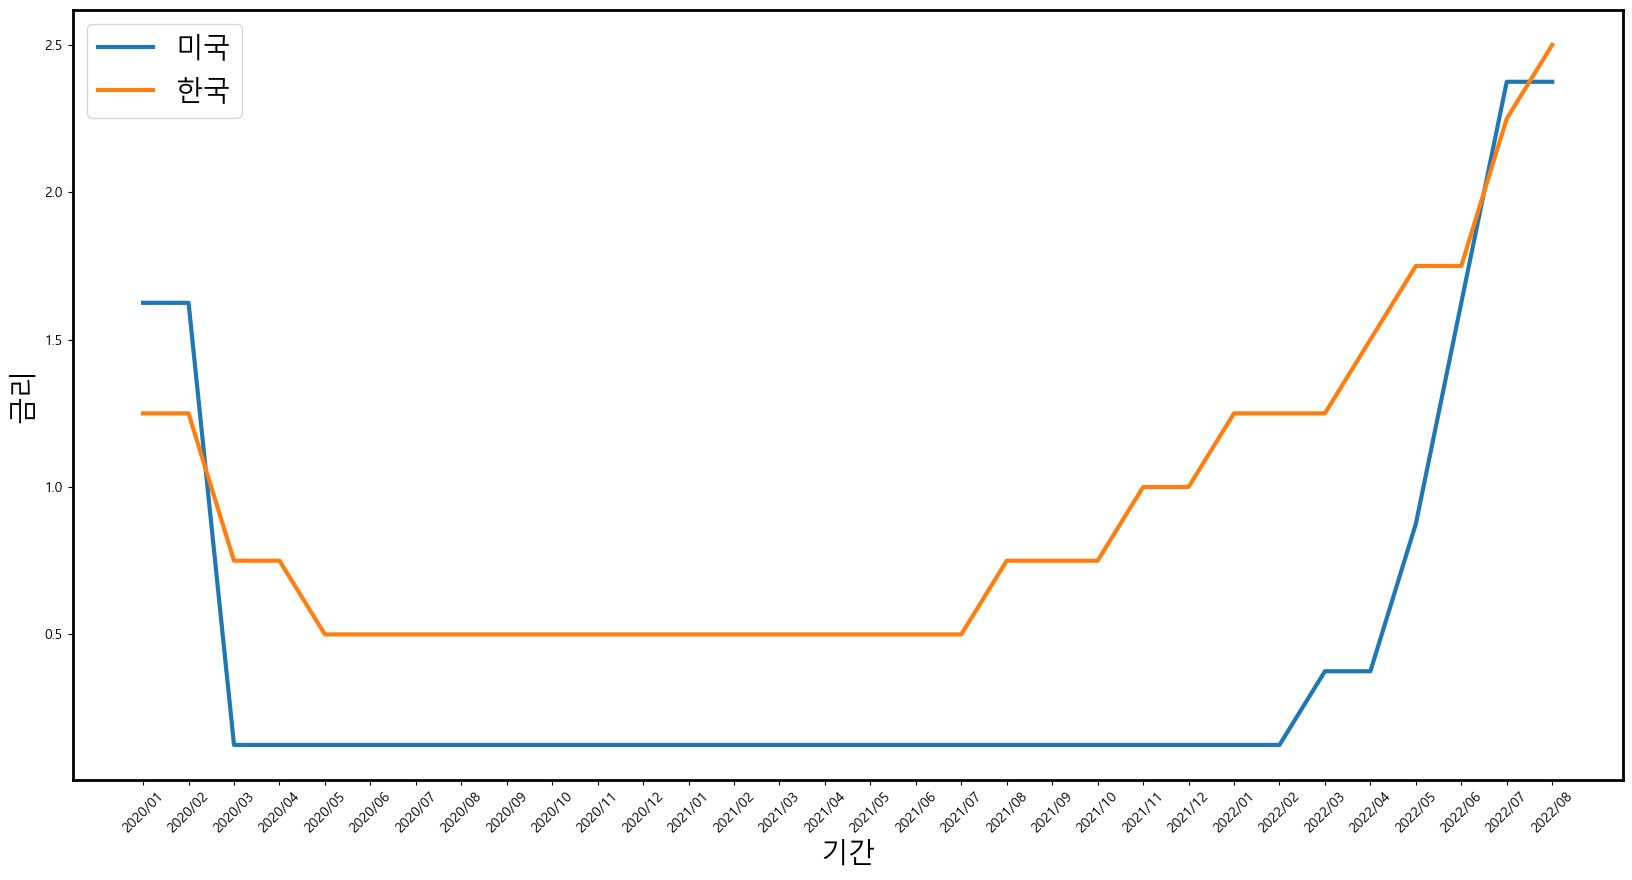

In [38]:
# 2020년 ~ 현재 미국금리
df_uint = df_usa.iloc[300:, :]
df_uint.reset_index(drop=True, inplace=True)

# 2020년 ~ 현재 한국금리
df_kint = df_korea.iloc[300:, :]
df_kint.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_uint, x='연월', y='미국_금리(%)', errorbar=None, legend=True)
sns.lineplot(df_kint, x='연월', y='한국_금리(%)', errorbar=None, legend=True)
plt.xticks(rotation=45)
plt.xlabel('기간', fontsize=20)
plt.ylabel('금리', fontsize=20)
plt.legend(['미국', '한국'], fontsize=20)
plt.show()

## 2) 환율

### ① 1995 ~ 2022년 원/달러 환율 변화

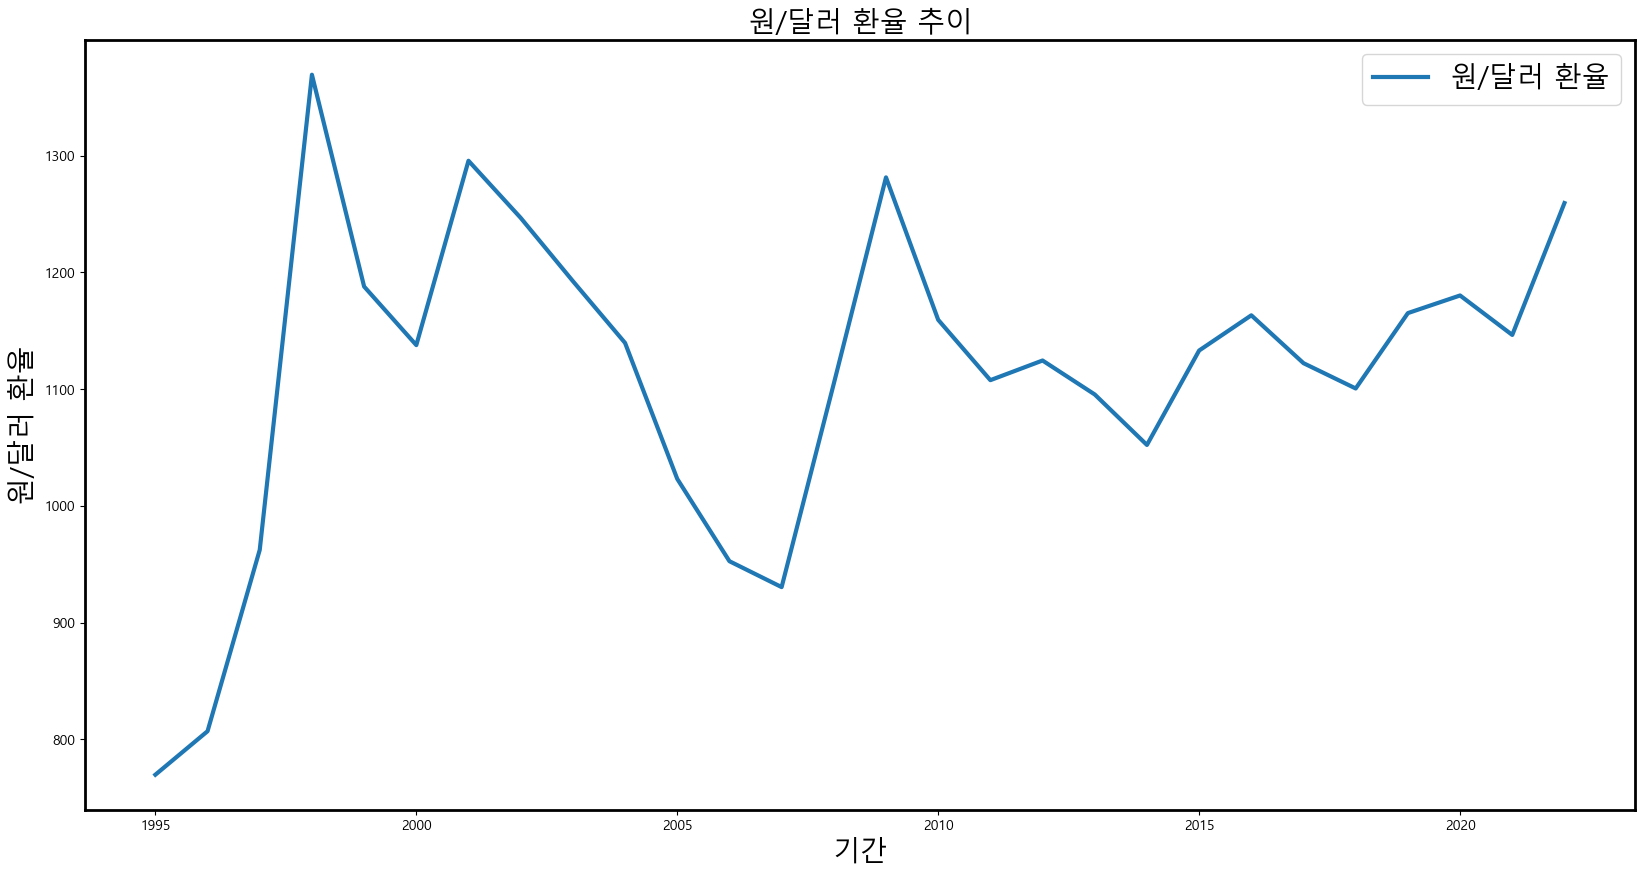

In [39]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='원/미국달러(매매기준율)', errorbar=None, legend=True)
plt.title('원/달러 환율 추이', fontsize=20)
plt.xlabel('기간', fontsize=20)          
plt.ylabel('원/달러 환율', fontsize=20)
plt.legend(['원/달러 환율'], fontsize=20, loc='best')
plt.show()

### ② 1997년, 2008년, 2022년 기간 별 환율 추이

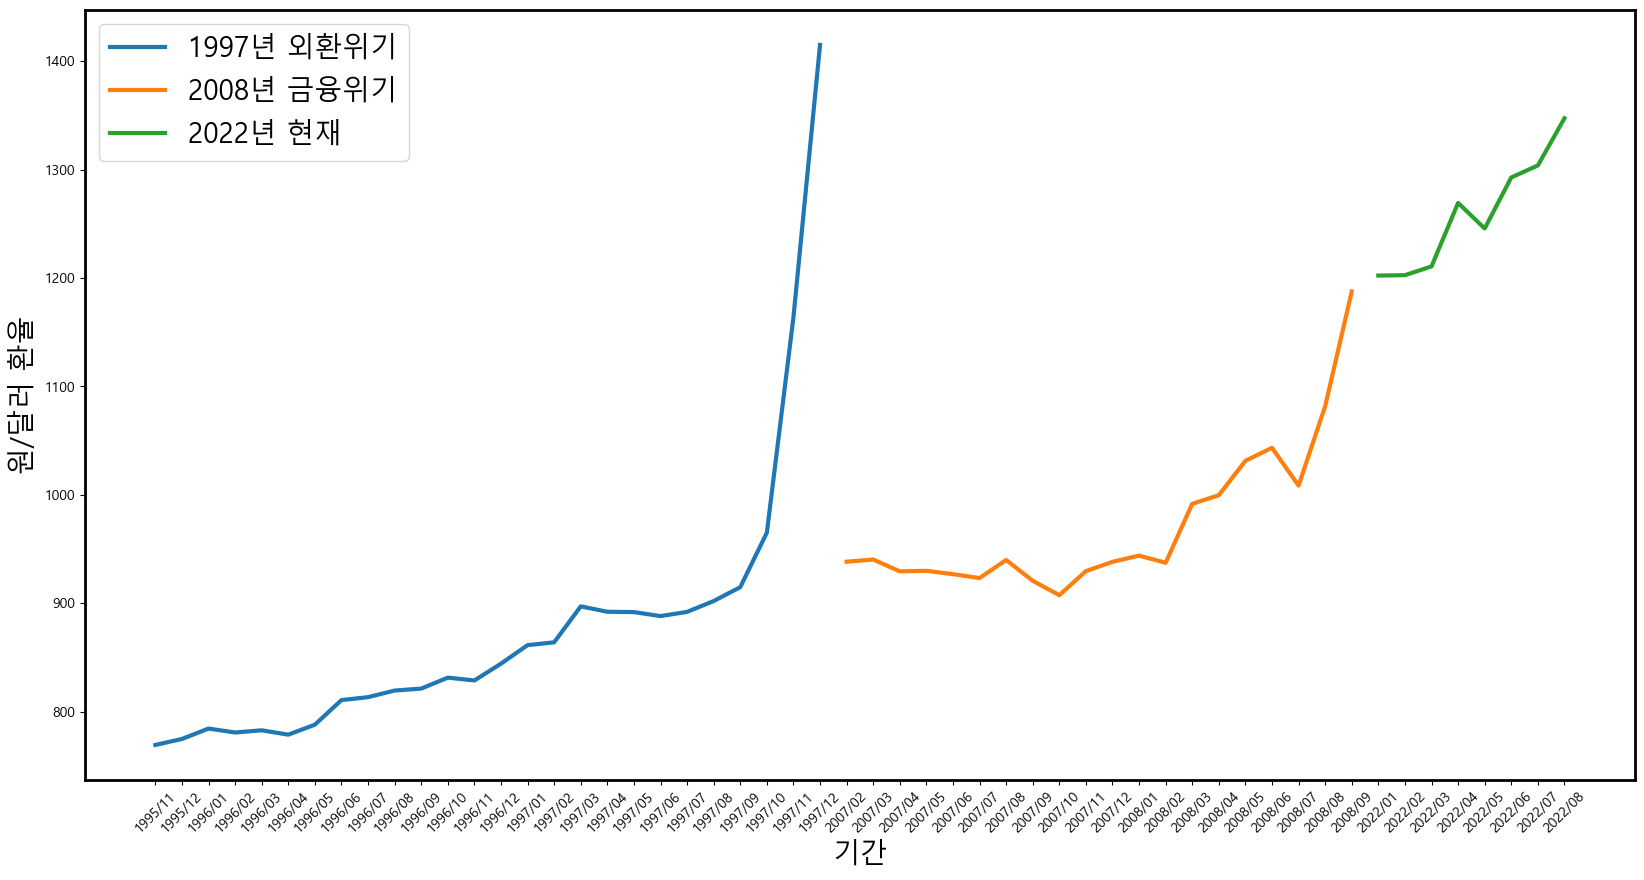

In [40]:
x1 = IMF_k['연월']                                       
y1 = IMF_k['원/미국달러(매매기준율)']
x2 = global_dep['연월']
y2 = global_dep['원/미국달러(매매기준율)']
x3 = ty['연월']
y3 = ty['원/미국달러(매매기준율)']

plt.figure()
sns.lineplot(data=IMF_k, x=x1, y=y1, errorbar=None, legend=True)
sns.lineplot(data=global_dep, x=x2, y=y2, errorbar=None, legend=True)
sns.lineplot(data=ty, x=x3, y=y3, errorbar=None, legend=True)

plt.xticks(rotation=45)
plt.xlabel('기간', fontsize=20)          
plt.ylabel('원/달러 환율', fontsize=20)
plt.legend(['1997년 외환위기', '2008년 금융위기', '2022년 현재'], loc='best', fontsize=20)
plt.show()

## 3) 경상수지

### ① 1997년 외환위기

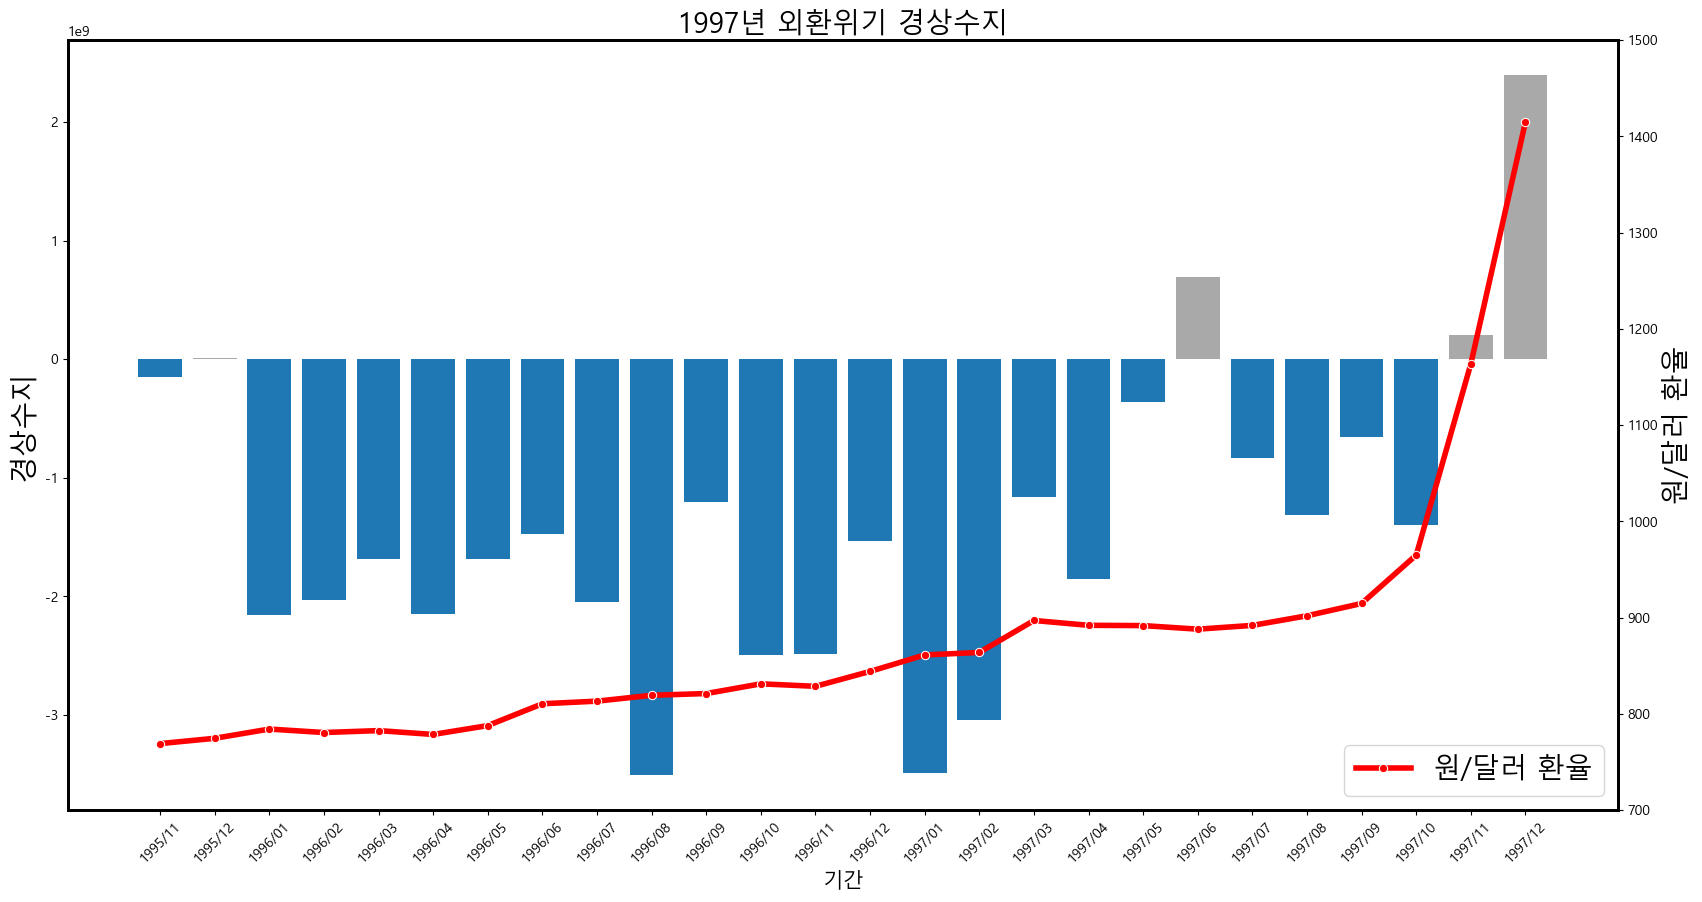

In [41]:
# 데이터
x_category = IMF_k['연월']
y_category1 = IMF_k['경상수지(달러)']
y_category2 = IMF_k['원/미국달러(매매기준율)']

# 시각화
# y1
fig, ax1 = plt.subplots(figsize=(20, 10))

colors = ['tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey']
xtick_label_position = list(range(len(x_category)))
plt.xticks(xtick_label_position, x_category, rotation=45)

plt.bar(xtick_label_position, y_category1, color=colors)

# y2
ax2 = ax1.twinx()
sns.lineplot(data = IMF_k, x=x_category, y=y_category2, linewidth=4, color='r', marker='o', errorbar=None, legend=True, ax=ax2)

# 범례, 축 설정
plt.title('1997년 외환위기 경상수지', fontsize=20)
ax1.set_xlabel('기간', fontsize=15)       
ax1.set_ylabel('경상수지', fontsize=20, rotation = 90)
ax2.set_ylabel('원/달러 환율', fontsize=20, rotation = 90)
ax2.legend(['원/달러 환율'], fontsize=20, loc='lower right')
ax2.set_ylim(700, 1500)
plt.show()

### ② 2008년 금융위기

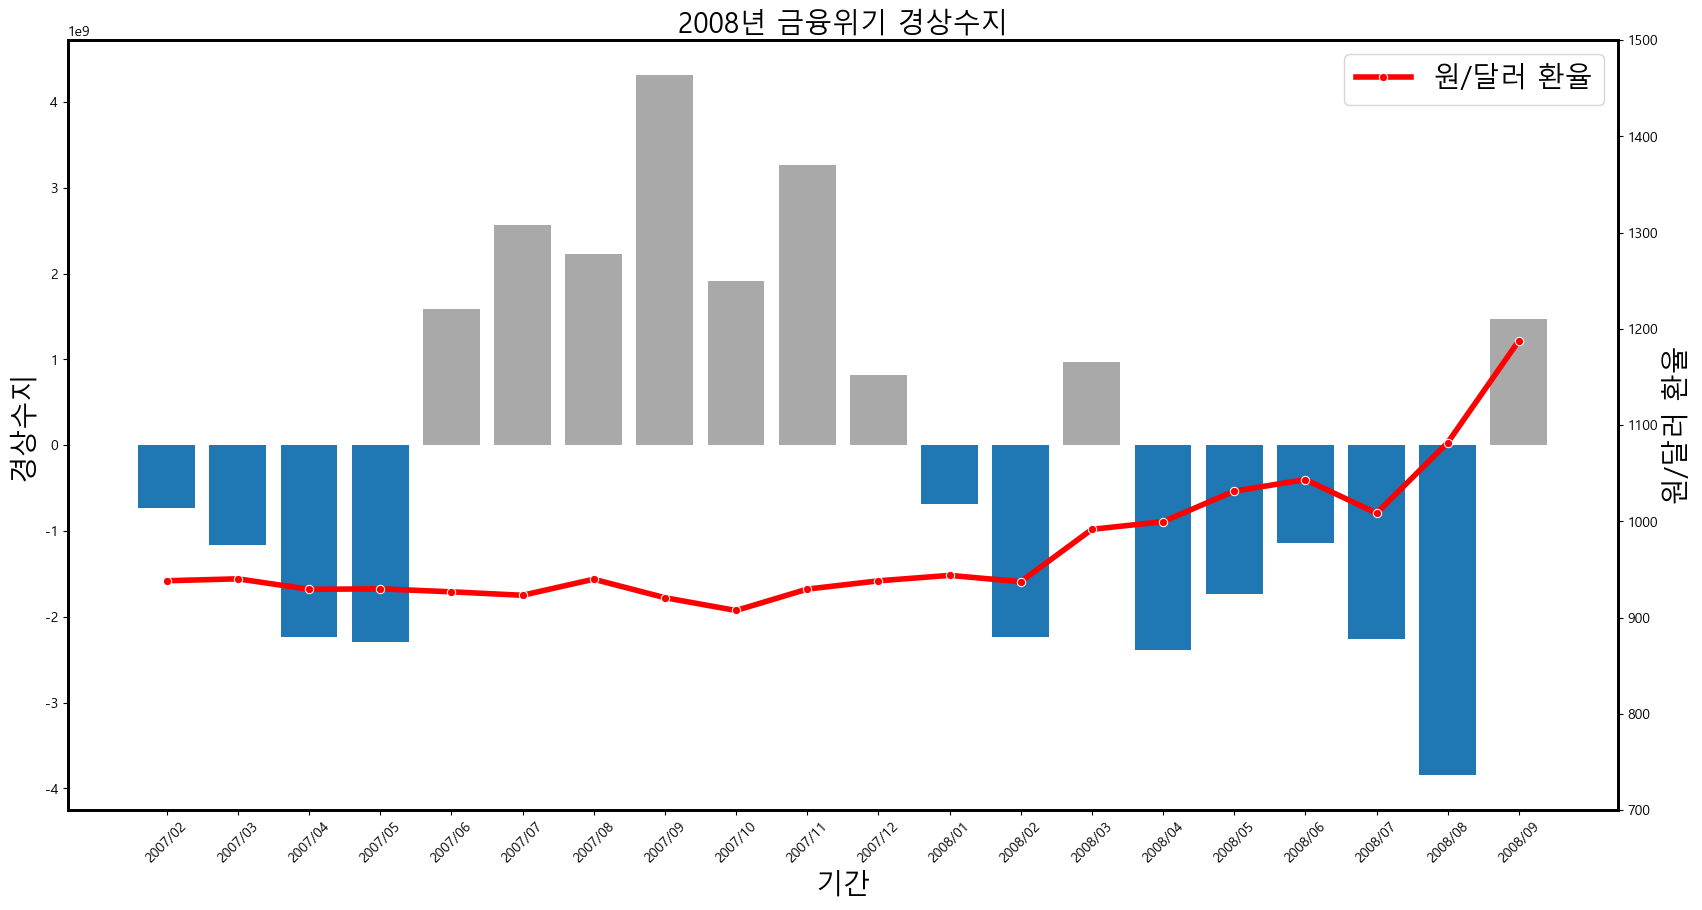

In [42]:
# 데이터
x_category = global_dep['연월']
y_category1 = global_dep['경상수지(달러)']
y_category2 = global_dep['원/미국달러(매매기준율)']

# 시각화
# y1
fig, ax1 = plt.subplots(figsize=(20, 10))

colors = ['tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category)))
plt.xticks(xtick_label_position, x_category, rotation=45)

plt.bar(xtick_label_position, y_category1, color=colors)

# y2
ax2 = ax1.twinx()
sns.lineplot(data = IMF_k, x=x_category, y=y_category2, linewidth=4, color='r', marker='o', errorbar=None, legend=True, ax=ax2)

# 범례, 축 설정
plt.title('2008년 금융위기 경상수지', fontsize=20)
ax1.set_xlabel('기간', fontsize=20)           
ax1.set_ylabel('경상수지', fontsize=20, rotation = 90)
ax2.set_ylabel('원/달러 환율', fontsize=20, rotation = 90)
ax2.legend(['원/달러 환율'], fontsize=20, loc='upper right')
ax2.set_ylim(700, 1500)
plt.show()

### ③ 2020년 양적완화 시기

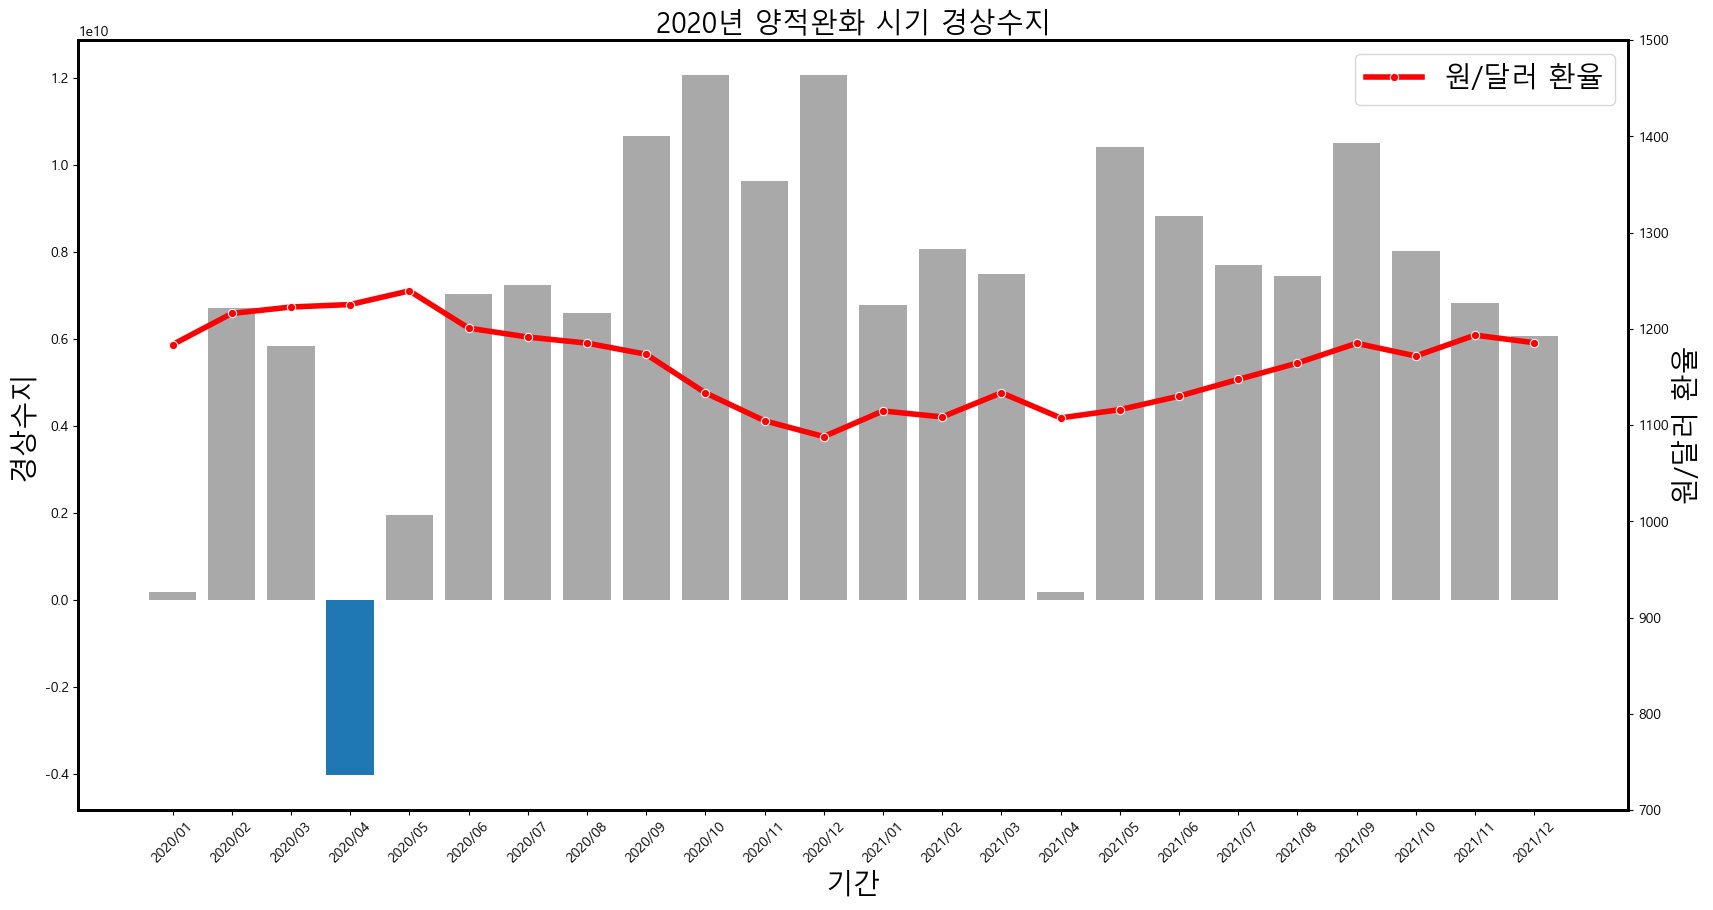

In [43]:
# 데이터
x_category = ly['연월']
y_category1 = ly['경상수지(달러)']
y_category2 = ly['원/미국달러(매매기준율)']

# 시각화
# y1
fig, ax1 = plt.subplots(figsize=(20, 10))

colors = ['darkgrey','darkgrey','darkgrey','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category)))
plt.xticks(xtick_label_position, x_category, rotation=45)

plt.bar(xtick_label_position, y_category1, color=colors)

# y2
ax2 = ax1.twinx()
sns.lineplot(data = IMF_k, x=x_category, y=y_category2, linewidth=4, color='r', marker='o', errorbar=None, legend=True, ax=ax2)

# 범례, 축 설정
plt.title('2020년 양적완화 시기 경상수지', fontsize=20)
ax1.set_xlabel('기간', fontsize=20)            
ax1.set_ylabel('경상수지', fontsize=20, rotation = 90)
ax2.set_ylabel('원/달러 환율', fontsize=20, rotation = 90)
ax2.legend(['원/달러 환율'], fontsize=20, loc='upper right')
ax2.set_ylim(700, 1500)
plt.show()

### ④ 2022년 현재

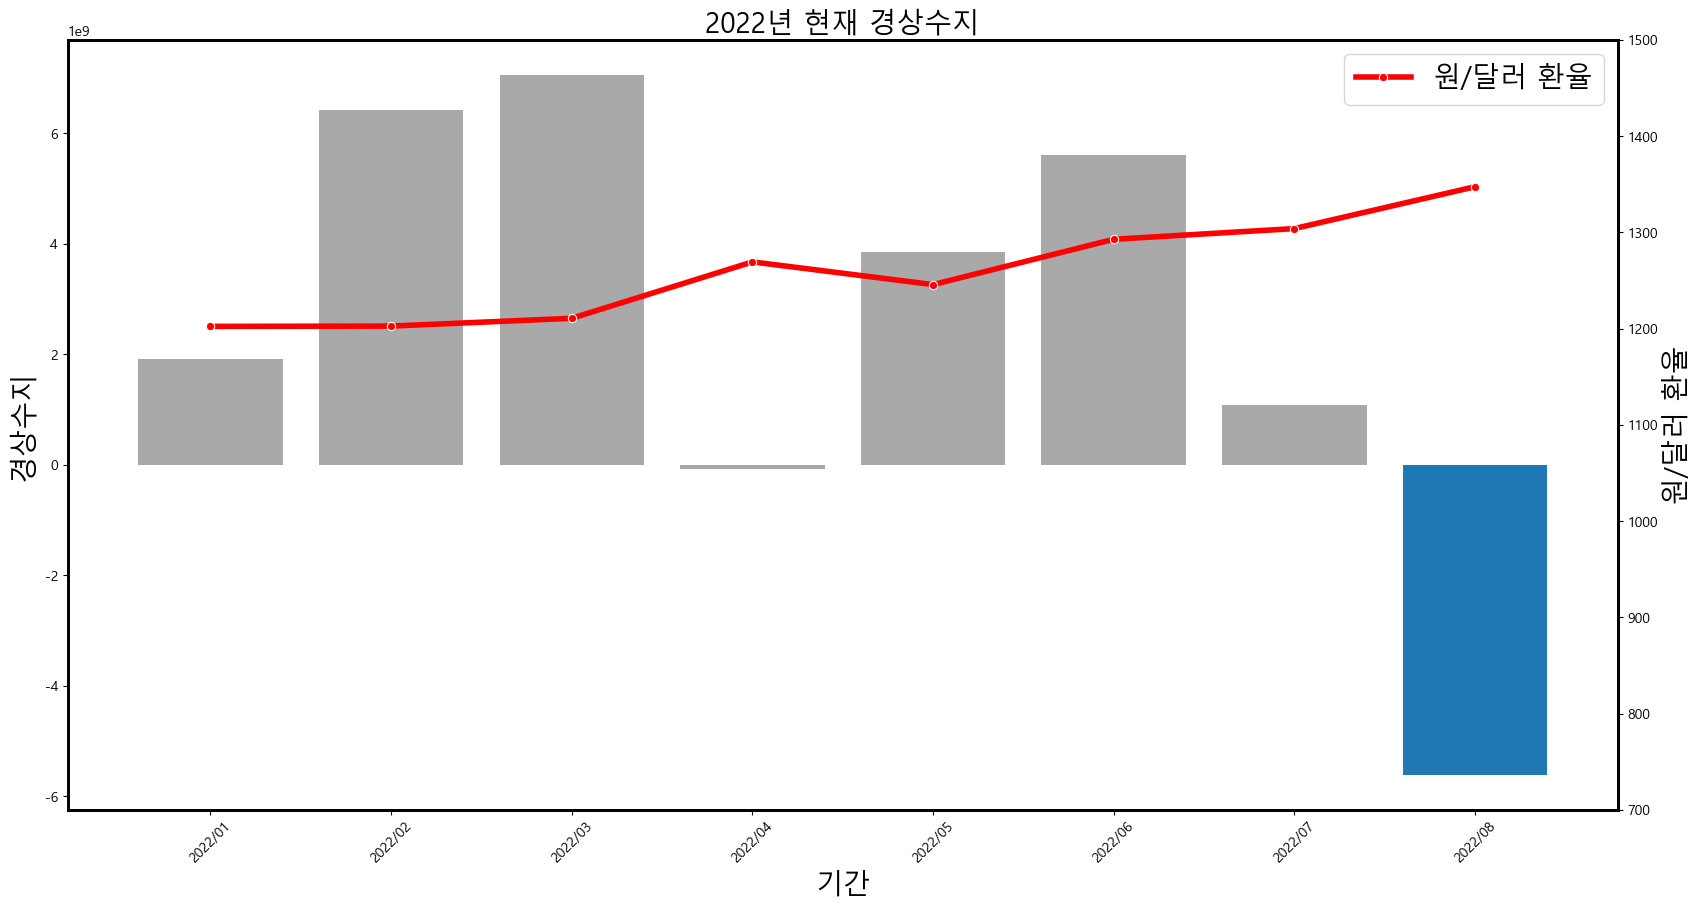

In [44]:
# 데이터
x_category = ty['연월']
y_category1 = ty['경상수지(달러)']
y_category2 = ty['원/미국달러(매매기준율)']

# 시각화
# y1
fig, ax1 = plt.subplots(figsize=(20, 10))

colors = ['darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue']
xtick_label_position = list(range(len(x_category)))
plt.xticks(xtick_label_position, x_category, rotation=45)

plt.bar(xtick_label_position, y_category1, color=colors)

# y2
ax2 = ax1.twinx()
sns.lineplot(data = IMF_k, x=x_category, y=y_category2, linewidth=4, color='r', marker='o', errorbar=None, legend=True, ax=ax2)

# 범례, 축 설정
plt.title('2022년 현재 경상수지', fontsize=20)
ax1.set_xlabel('기간', fontsize=20)            
ax1.set_ylabel('경상수지', fontsize=20, rotation = 90)
ax2.set_ylabel('원/달러 환율', fontsize=20, rotation = 90)
ax2.legend(['원/달러 환율'], fontsize=20, loc='upper right')
ax2.set_ylim(700, 1500)
plt.show()

## 4) 한국 외환보유액

### ① 1995 ~ 2022년 한국 외환보유액 변화

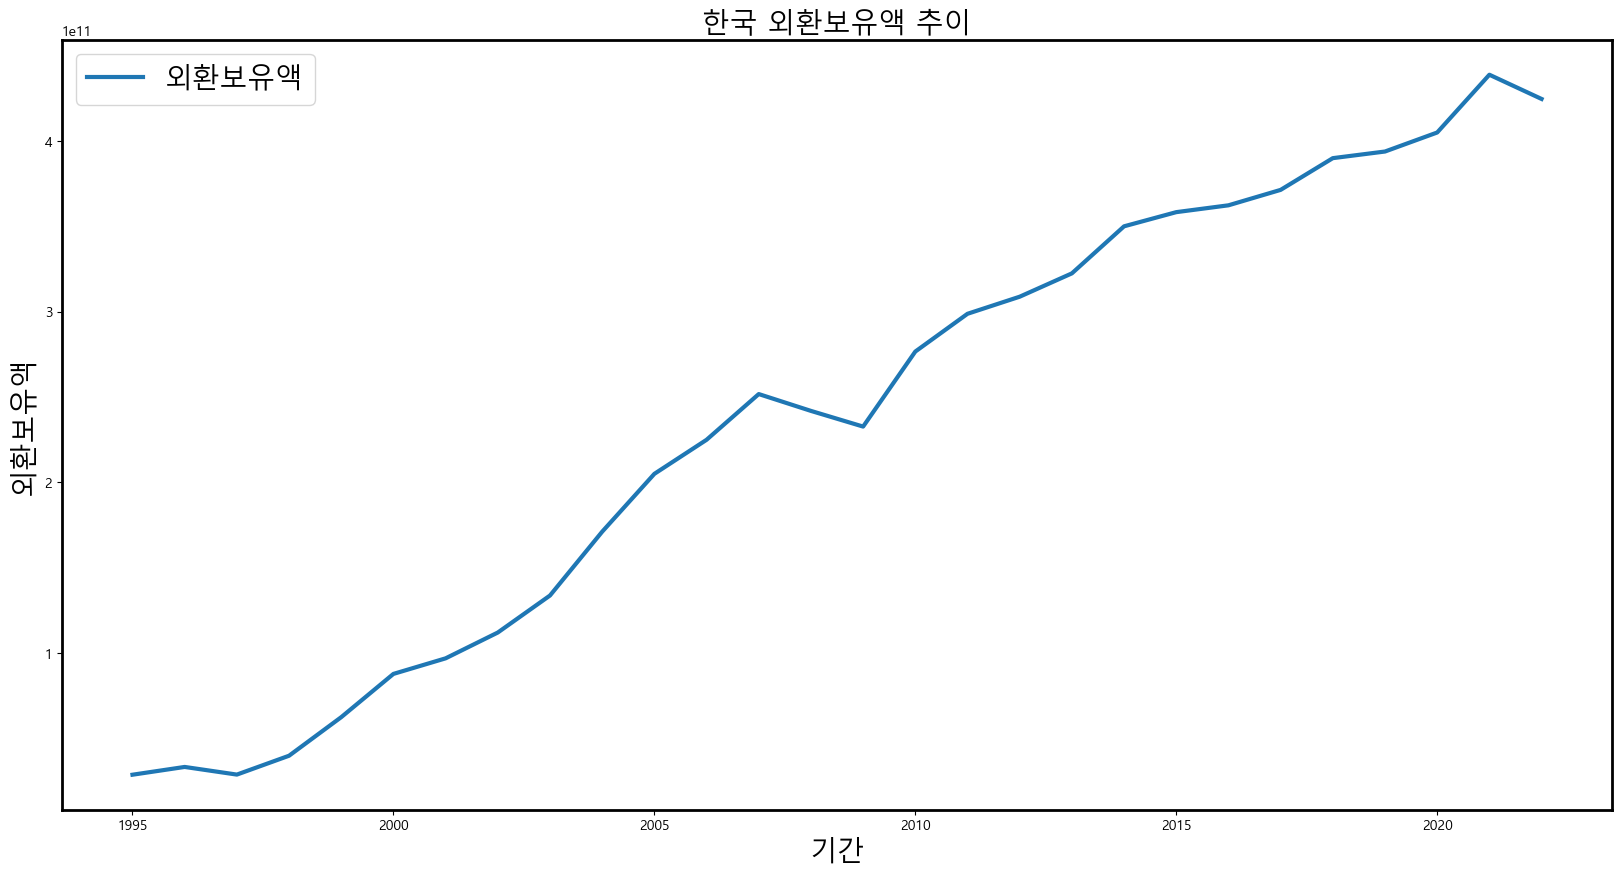

In [45]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='한국_외환보유액(달러)', errorbar=None, legend=True)
plt.title('한국 외환보유액 추이', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('외환보유액', fontsize=20)
plt.legend(['외환보유액'], fontsize=20, loc='best')
plt.show()

### ② 1997년 외환위기, 2008년 금융위기, 2022년 현재

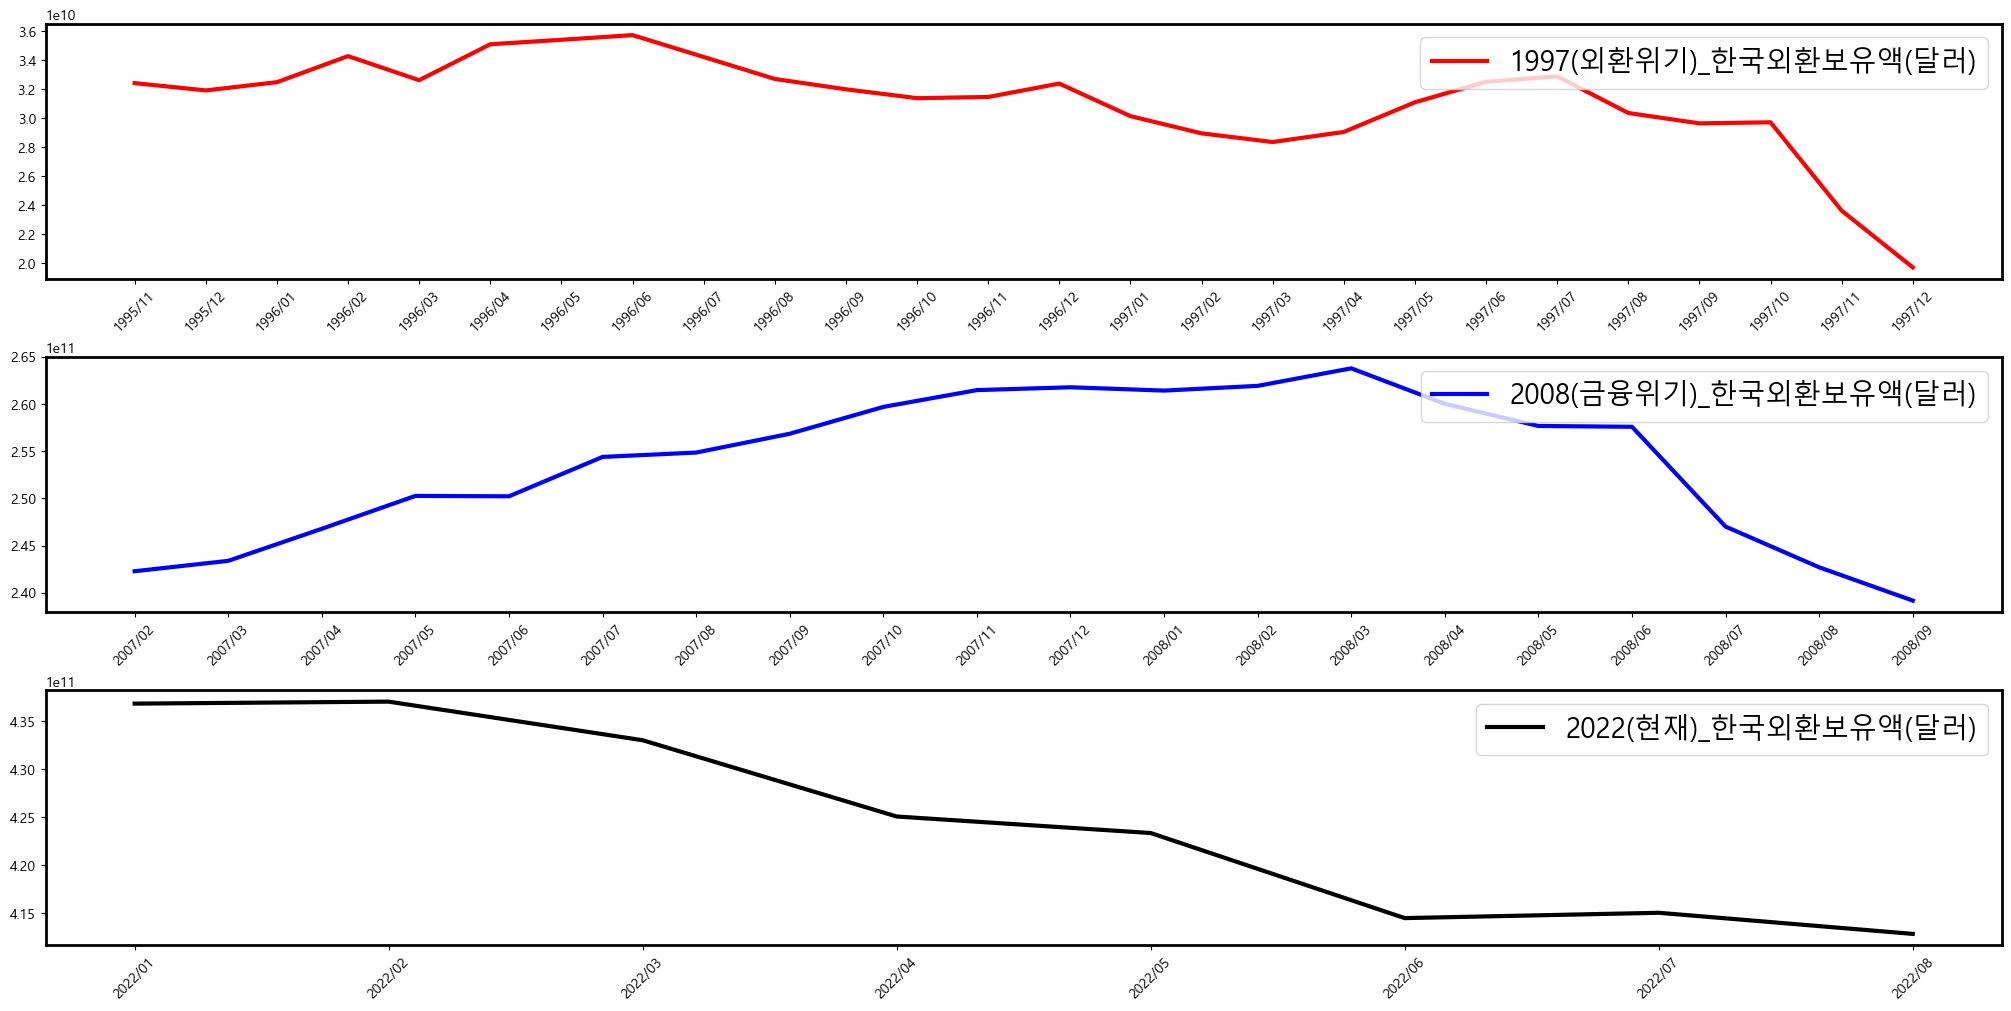

In [46]:
x1 = IMF_k['연월']          
y1 = IMF_k['한국_외환보유액(달러)']
x2 = global_dep['연월']
y2 = global_dep['한국_외환보유액(달러)']
x3 = ty['연월']
y3 = ty['한국_외환보유액(달러)']
 
fig, ax = plt.subplots(3, 1, constrained_layout=True)                 
ax[0].plot(x1,y1,color='r',label='1997(외환위기)_한국외환보유액(달러)')
ax[1].plot(x2,y2,color='b',label='2008(금융위기)_한국외환보유액(달러)')
ax[2].plot(x3,y3,color='k',label='2022(현재)_한국외환보유액(달러)')

ax[0].set_xticklabels(x1, rotation=45)
ax[1].set_xticklabels(x2, rotation=45)
ax[2].set_xticklabels(x3, rotation=45)

ax[0].legend(loc='upper right', fontsize=20)
ax[1].legend(loc='upper right', fontsize=20)
ax[2].legend(loc='upper right', fontsize=20)
plt.show()

## 5) 단기외채

### ① 1995 ~ 2022 단기외채 변화

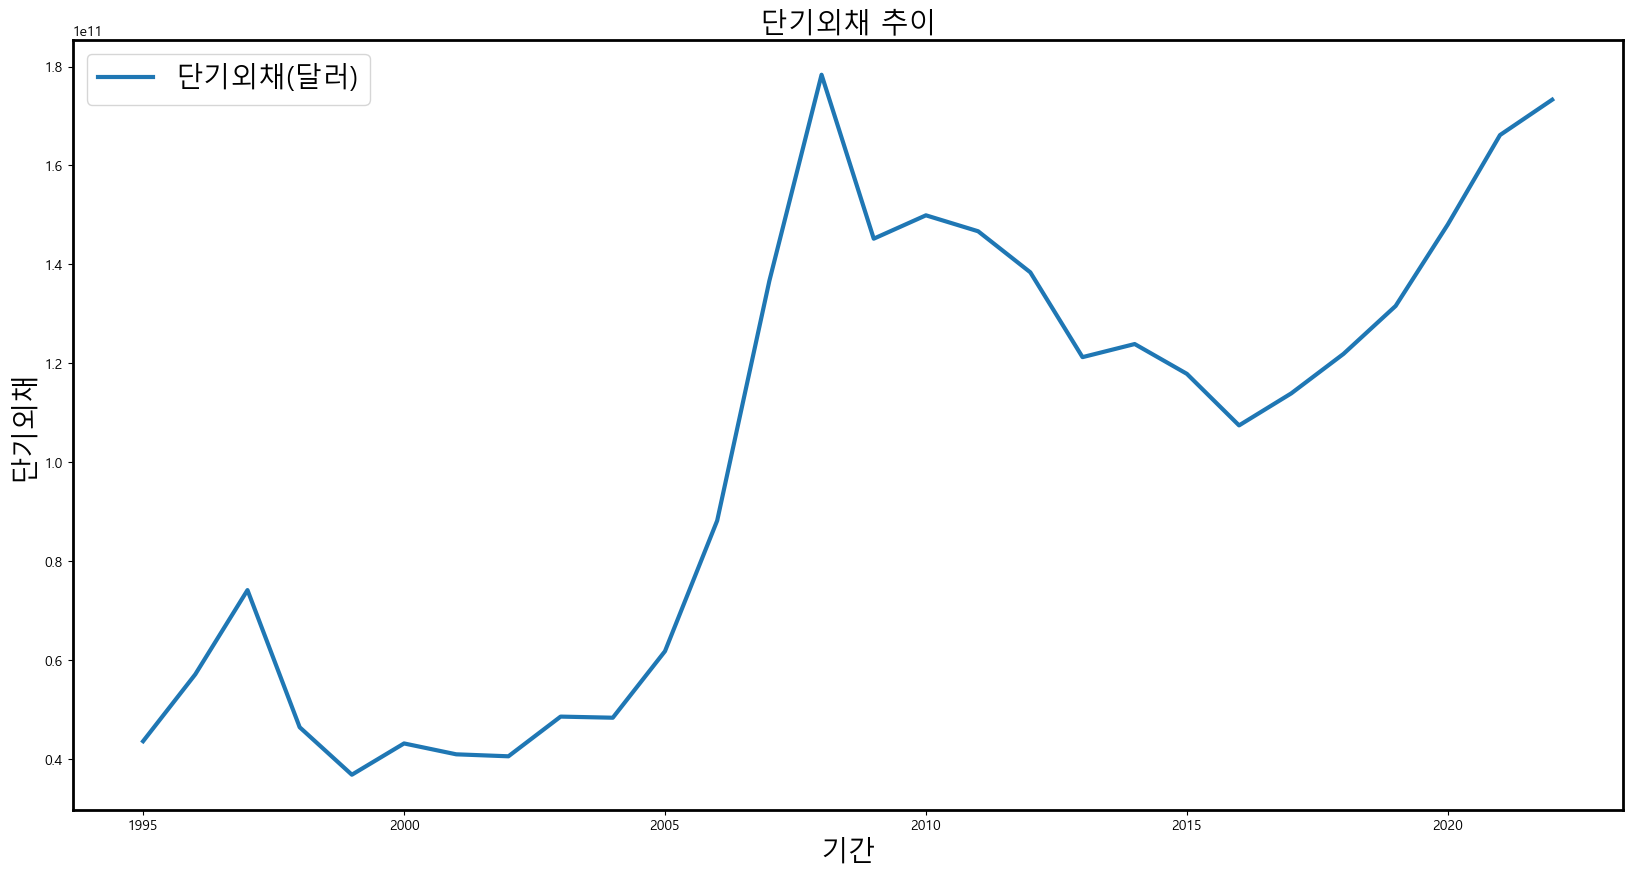

In [47]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='단기외채(달러)', errorbar=None, legend=True)
plt.title('단기외채 추이', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('단기외채', fontsize=20)
plt.legend(['단기외채(달러)'], fontsize=20, loc='best')
plt.show()

### ② 1995 ~ 2022 단기외채 및 외환보유액 변화

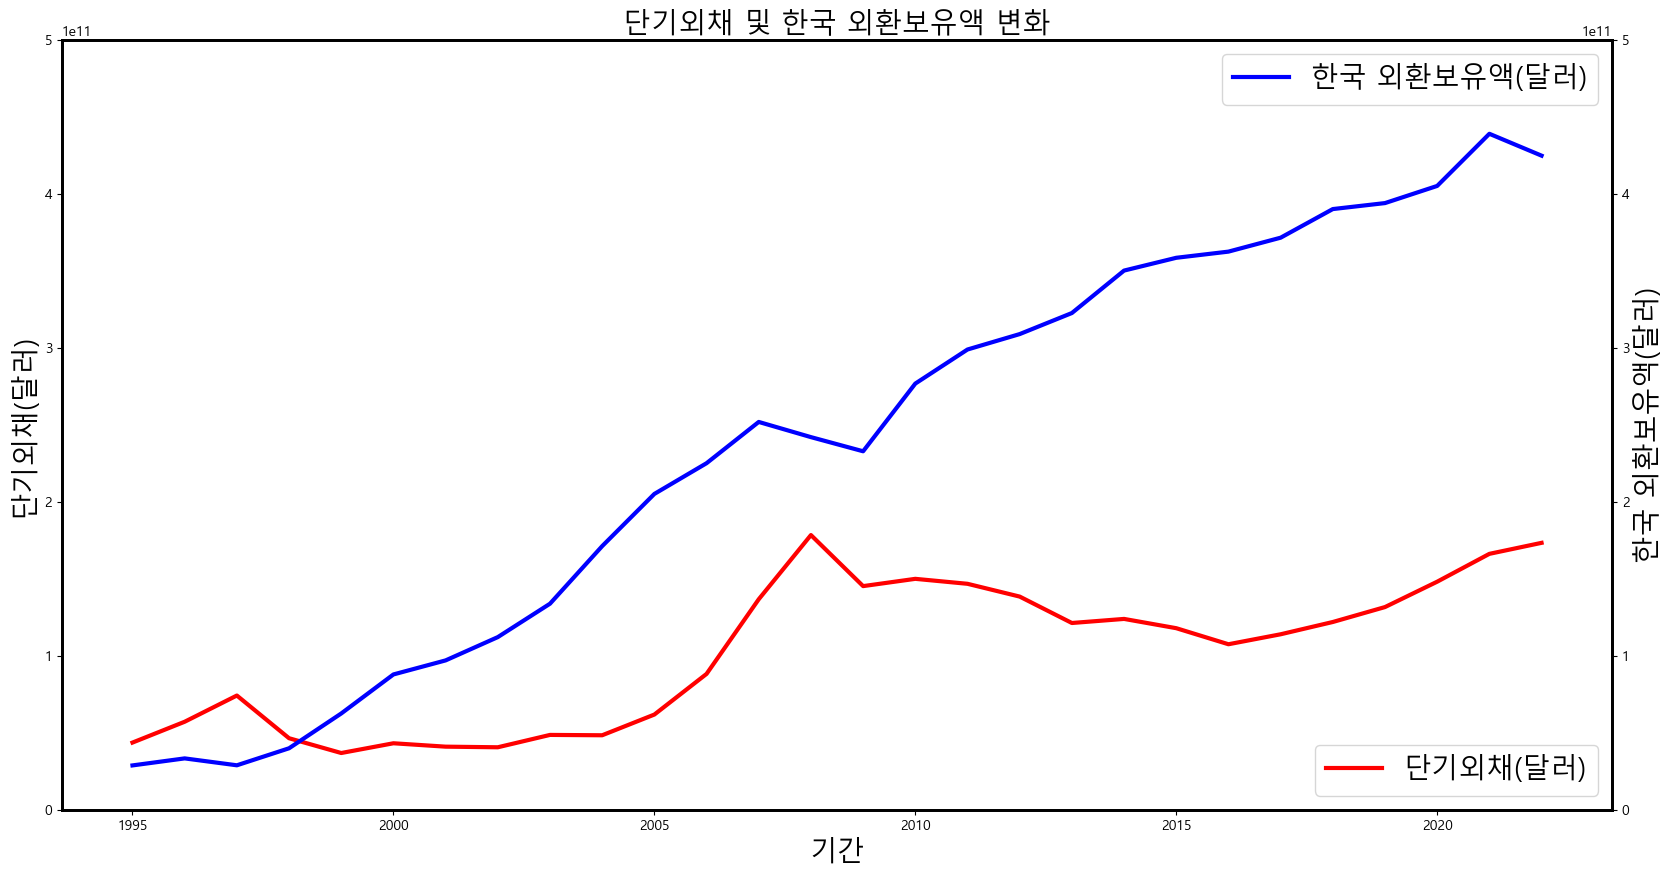

In [48]:
# 데이터
x_category = df_korea['년도']
y_category1 = df_korea['단기외채(달러)']
y_category2 = df_korea['한국_외환보유액(달러)']

# 시각화
# y1
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_korea, x=x_category, y=y_category1, color='r', errorbar=None, legend=True, ax=ax1)

# y2
ax2 = ax1.twinx()
sns.lineplot(data = df_korea, x=x_category, y=y_category2, color='b', errorbar=None, legend=True, ax=ax2)

# 범례, 축 설정
plt.title('단기외채 및 한국 외환보유액 변화', fontsize=20)
ax1.set_xlabel('기간', fontsize=20)            
ax1.set_ylabel('단기외채(달러)', fontsize=20, rotation = 90)
ax2.set_ylabel('한국 외환보유액(달러)', fontsize=20, rotation = 90)
ax1.legend(['단기외채(달러)'], loc='lower right', fontsize=20)
ax2.legend(['한국 외환보유액(달러)'], loc='upper right', fontsize=20)
ax1.set_ylim(0, 500000000000)
ax2.set_ylim(0, 500000000000)
plt.show()

### ③ 단기외채 비율(단기외채/외환보유액)

In [49]:
df_fc_ratio = data[['연월','년도','단기외채/외환보유액']]
df_fc_ratio.head()

,연월,년도,단기외채/외환보유액
0,1995/01,1995,1.790688
1,1995/02,1995,1.782530
2,1995/03,1995,1.771330
3,1995/04,1995,1.995662
4,1995/05,1995,1.958120


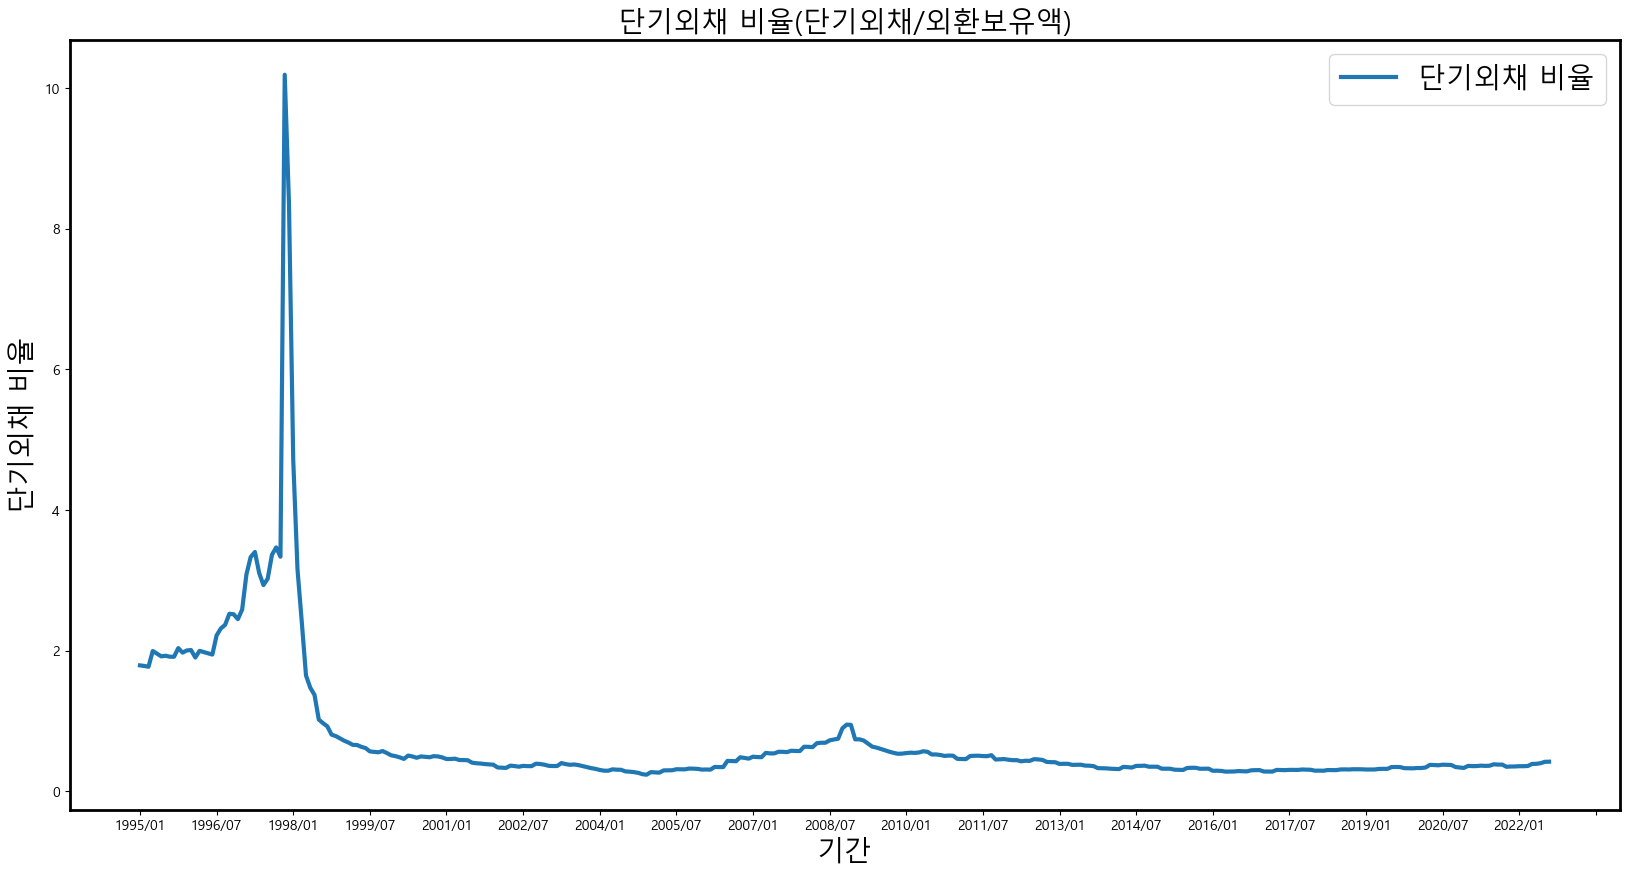

In [50]:
fig, ax = plt.subplots()

sns.lineplot(df_fc_ratio, x='연월', y='단기외채/외환보유액', errorbar=None, legend=True, ax=ax)
ax.xaxis.set_major_locator(MultipleLocator(18))

plt.title('단기외채 비율(단기외채/외환보유액)', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('단기외채 비율', fontsize=20)
plt.legend(['단기외채 비율'], fontsize=20, loc='best')
plt.show()

## 6. 데이터 분석 결론

### - 분석에 사용된 지표
금리, 환율, 경상수지, 외환보유액, 단기외채

### - 1997년 외환위기와 2008년 금융위기 두 시기 모두 비슷한 추세를 보이는 지표
경상수지

### - 1997년 외환위기와 2008년 금융위기 두 시기 서로 다른 추세를 보이는 지표

금리, 환율, 외환보유액, 단기외채

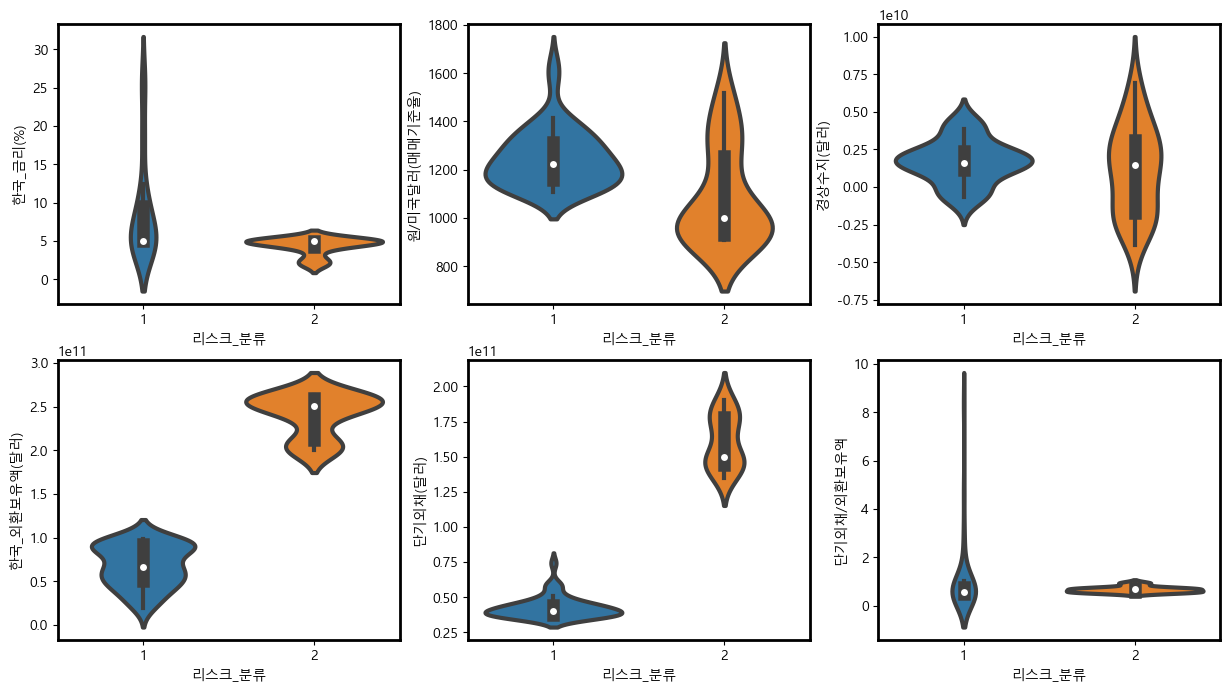

In [51]:
# 분포 비교
data_temp1 = data[data['리스크_분류'] == 1]
data_temp2 = data[data['리스크_분류'] == 2]
data_temp = pd.concat([data_temp1, data_temp2])

fig, axes = plt.subplots(2, 3, figsize = (15, 8))

sns.violinplot(x='리스크_분류', y='한국_금리(%)',data=data_temp, ax = axes[0, 0])
sns.violinplot(x='리스크_분류', y='원/미국달러(매매기준율)',data=data_temp, ax = axes[0, 1])
sns.violinplot(x='리스크_분류', y='경상수지(달러)',data=data_temp, ax = axes[0, 2])
sns.violinplot(x='리스크_분류', y='한국_외환보유액(달러)',data=data_temp, ax=axes[1, 0])
sns.violinplot(x='리스크_분류', y='단기외채(달러)',data=data_temp, ax = axes[1, 1])
sns.violinplot(x='리스크_분류', y='단기외채/외환보유액',data=data_temp, ax = axes[1, 2])
plt.show()


# 

# Ⅳ. 회귀분석

In [52]:
# 한국
df_regression = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 20, 24, 25, 29, 35, 37, 38, 40]]
df_regression

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),미국장단기(국채)금리차,무역수지(달러),단기외채(달러),단기외채/외환보유액,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,925.56,25634400000,9.6,-1209000000,0.34,-1201000000,36200000000,1.790688,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,885.69,25752333000,9.6,-1522000000,0.43,-1462000000,36200000000,1.782530,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,931.78,25878700000,9.6,-1562000000,0.40,-1668000000,36200000000,1.771330,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,897.00,26551800000,9.6,-748000000,0.47,-934000000,41900000000,1.995662,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,882.50,27068000000,9.6,-959000000,0.41,-1171000000,41900000000,1.958120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,2695.05,425076761000,0.7,-79000000,0.19,-2508000000,174900000000,0.389274,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,2685.90,423355152000,0.7,3860000000,0.32,-1614000000,174900000000,0.390654,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,2332.64,414491928000,0.7,5610000000,0.06,-2487000000,174900000000,0.399061,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,2451.50,415046922000,0.7,1089000000,-0.22,-4805000000,183800000000,0.419056,0


### 1. 훈련(train), 검증(valid), 테스트(test) 분류

In [53]:
x_train = df_regression.iloc[:251, 2:-1]
x_test = df_regression.iloc[251:, 2:-1]

y_train = df_regression.iloc[:251, -1]
y_test = df_regression.iloc[251:, -1]

In [54]:
from sklearn.model_selection import train_test_split
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, random_state=2)

### 2. 회귀분석 시작

In [55]:
# 0 : 평소
# 1 : 외환위기(1997.12 ~ 2001.8 → IMF 기간 지정)
# 2 : 금융위기(2007.4 ~ 2009.4 → 대침체 기간 지정)

In [56]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_train_2, y_train_2)

pred_train = model.predict(x_train_2)
pred_test = model.predict(x_val)

prob_train = model.predict_proba(x_train_2)
prob_test = model.predict_proba(x_val)

pred_test_2 = model.predict(x_test)

pred_test_2_df = pd.DataFrame(pred_test_2)
pred_test_2_df.columns = ['리스크 분류(0:평시, 1:외환위기, 2:금융위기)']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_pred = pd.concat([df_data, pred_test_2_df], axis=1)
df_pred.tail(10)

,연월,"리스크 분류(0:평시, 1:외환위기, 2:금융위기)"
71,2021/11,0
72,2021/12,0
73,2022/01,0
74,2022/02,0
75,2022/03,0
76,2022/04,0
77,2022/05,0
78,2022/06,0
79,2022/07,0
80,2022/08,0


In [57]:
# 랜덤포레스트 predict_proba
prob_test_2 = model.predict_proba(x_test)

prob_test_2_df = pd.DataFrame(prob_test_2)
prob_test_2_df.columns = ['평시', '외환위기 리스크', '금융위기 리스크']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_prob = pd.concat([df_data, prob_test_2_df], axis=1)
df_prob

,연월,평시,외환위기 리스크,금융위기 리스크
0,2015/12,1.00,0.00,0.00
1,2016/01,1.00,0.00,0.00
2,2016/02,0.86,0.01,0.13
3,2016/03,0.99,0.01,0.00
4,2016/04,0.99,0.01,0.00
...,...,...,...,...
76,2022/04,0.65,0.05,0.30
77,2022/05,0.72,0.03,0.25
78,2022/06,0.63,0.05,0.32
79,2022/07,0.62,0.05,0.33


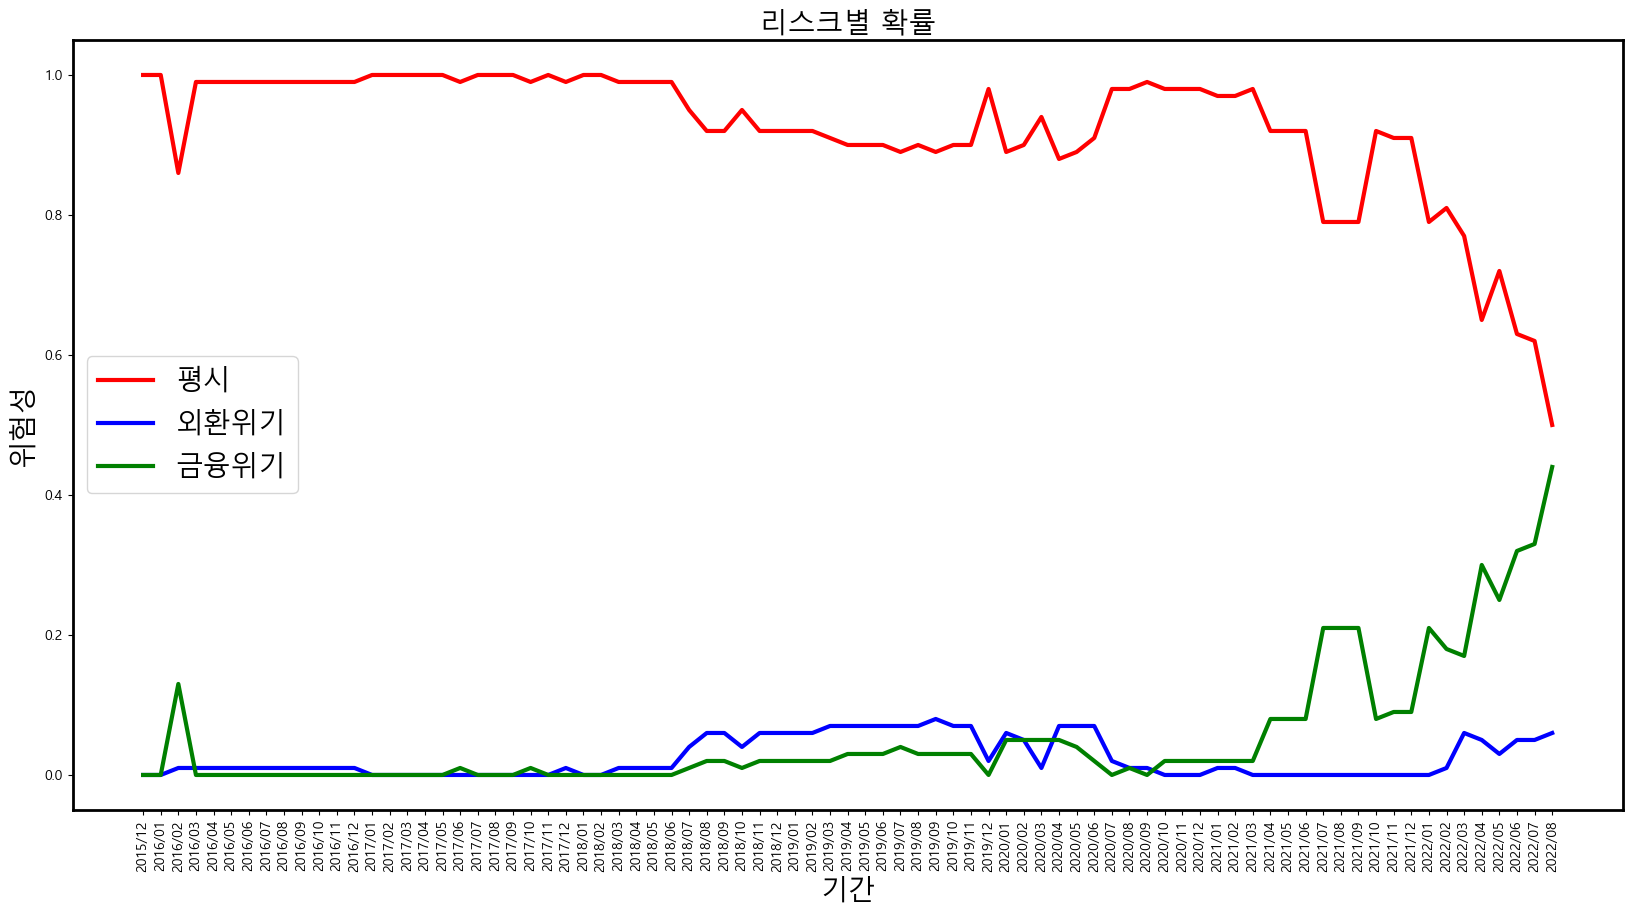

In [58]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_prob, x='연월', y='평시', c='r', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='외환위기 리스크', c='b', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='금융위기 리스크', c='g', errorbar=None, legend=True)

plt.title('리스크별 확률', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('위험성', fontsize=20)
plt.legend(['평시', '외환위기', '금융위기'], fontsize=20, loc='best')
plt.xticks(rotation=90)
plt.show()

### 3. 회귀분석 결과에 영향을 준 지표들

In [59]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = {'random_state' : range(1, 50, 1)}
gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', return_train_score=True, cv=5)
gridsearch.fit(x_train, y_train)

print('최적의 파라미터 : ', gridsearch.best_params_)
print('최적의 정확도 : ', gridsearch.best_score_)

최적의 파라미터 :  {'random_state': 1}
최적의 정확도 :  0.7669803921568628


In [60]:
# 중요 feature
# df_regression 컬럼에서 날짜 컬럼과 class 컬럼 제외
df_columns = list(df_regression.columns)[2:-1]

best = gridsearch.best_estimator_
a = best.feature_importances_
b = df_columns

feature_df = pd.DataFrame(data=a, index=b)
feature_df.columns = ['feature_importance']
feature_df = feature_df.sort_values(by='feature_importance', ascending=False)
feature_df_10 = feature_df.iloc[:10, :]
feature_df_10

,feature_importance
단기외채(달러),0.113047
한국_금리(%),0.107321
한국_외환보유액(달러),0.094140
원/미국달러(매매기준율),0.093723
원/위안(매매기준율),0.084392
단기외채/외환보유액,0.084053
한국(KOSPI)(1980.1.4=100),0.073633
원/일본엔(100엔),0.066587
중국_금리(%),0.059842
미국장단기(국채)금리차,0.048918


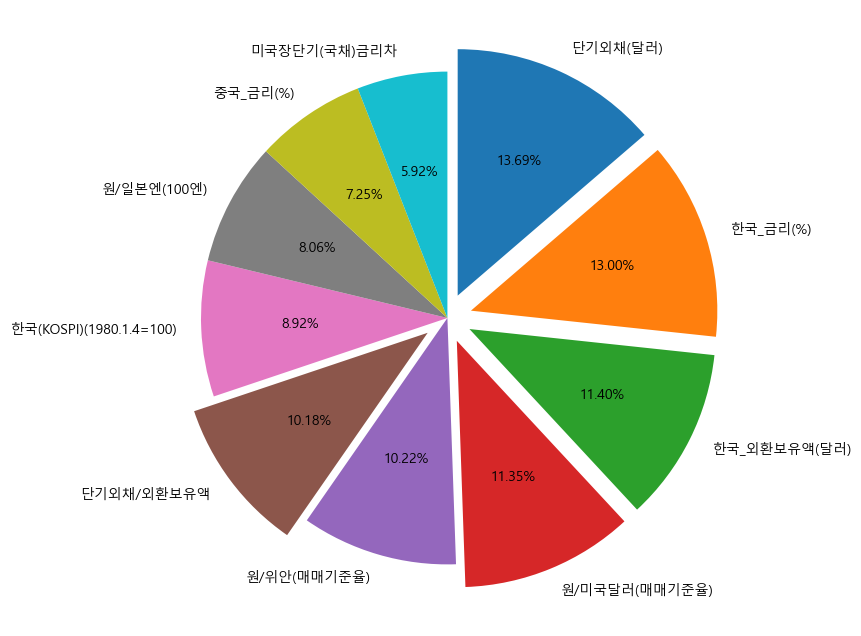

In [61]:
# 중요 feature 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot() # 프레임 생성
 
explode = [0.1,0.1,0.1,0.1,0,0.1,0,0,0,0] # 부각되는 정도를 결정

ax.pie(feature_df_10.feature_importance, # 파이차트 출력
       explode = explode, # 단기외채(달러)와 한국_금리(%)를 부각되게 함
       labels=feature_df_10.index,
       startangle=90, # 시작점을 90도(degree)로 지정
       counterclock=False, # 시계 방향으로 출력
       autopct=lambda p : '{:.2f}%'.format(p)) # 퍼센티지 출력
 
plt.show()

# 

# V. 결론

### 1. 미국의 장단기 금리차 역전

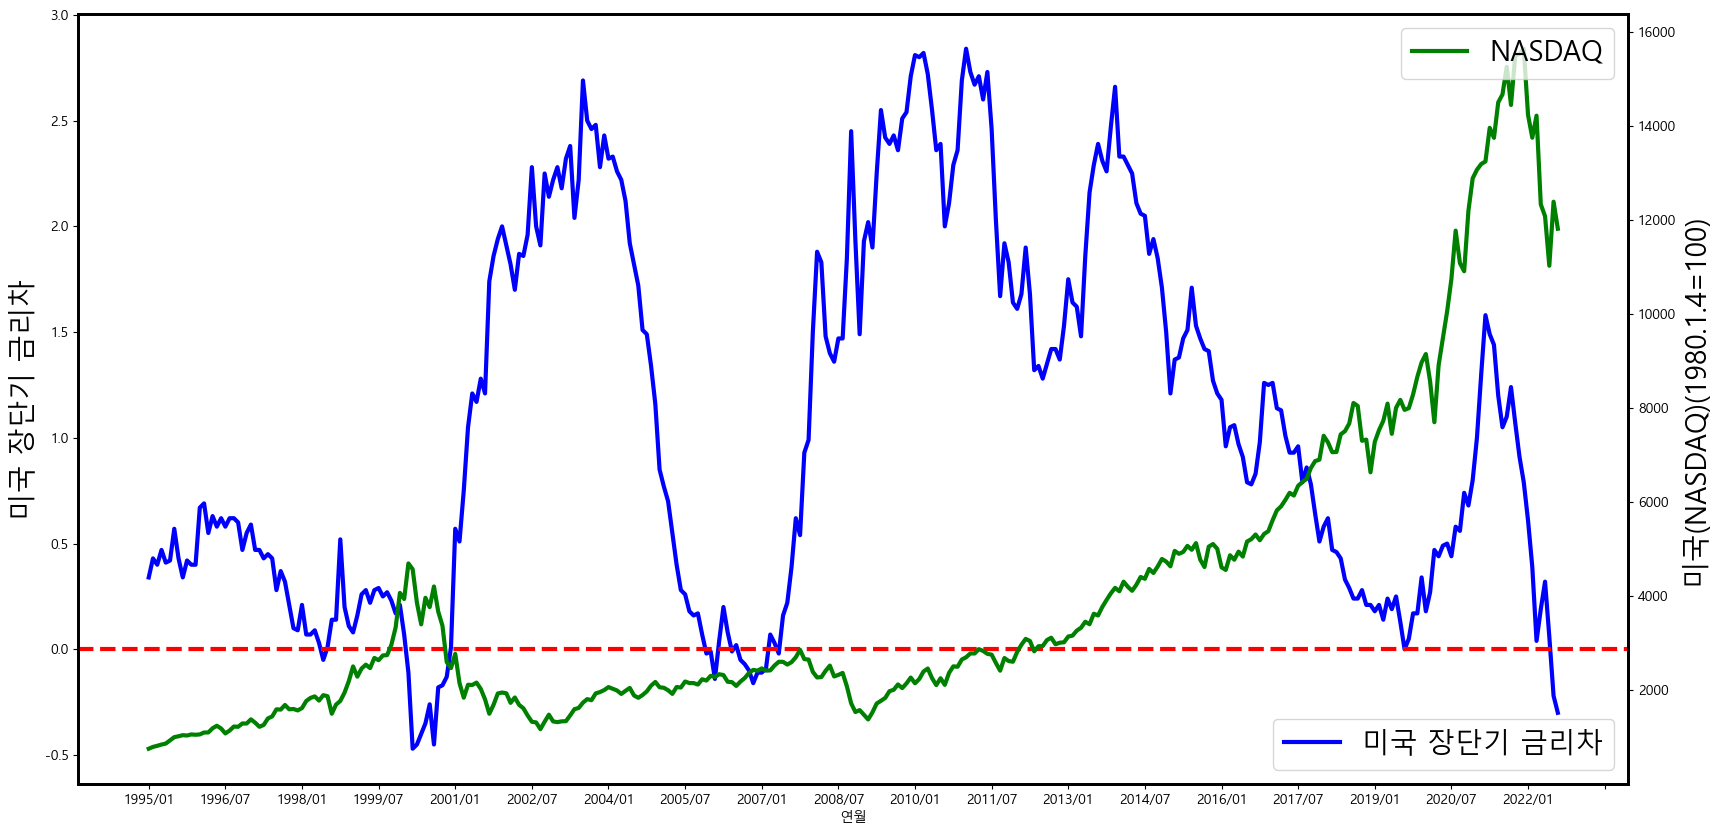

In [62]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.lineplot(ax = axe1, data = df_usa, x = '연월', y = '미국장단기(국채)금리차', errorbar=None, legend=True, color='b').axhline(0, ls='--', color='r')
c2 = sns.lineplot(ax = axe2, data = df_usa, x = '연월', y = '미국(NASDAQ)(1980.1.4=100)', errorbar=None, legend=True, color='g')

axe1.legend(['미국 장단기 금리차'], loc = 'lower right', fontsize=20)
axe2.legend(['NASDAQ'], loc = 'upper right', fontsize=20)

axe1.xaxis.set_major_locator(MultipleLocator(18))

axe1.set_ylabel('미국 장단기 금리차', fontsize=20)
axe2.set_ylabel('미국(NASDAQ)(1980.1.4=100)', fontsize=20)
plt.show()